# Importing necessary libraries

In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Defining functions

Adding new column country based on LA code

In [2]:
def insertAndSetCountryName(df,laCode):
    if "Country" not in df:
        df.insert(1,"Country",None)
    for index, row in df.iterrows():
        if(row[laCode].startswith("E")):
            df.at[index,"Country"] = "England"
        if(row[laCode].startswith("W")):
            df.at[index,"Country"] = "Wales"
        if(row[laCode].startswith("S")):
            df.at[index,"Country"] = "Scotland"
        if(row[laCode].startswith("N")):
            df.at[index,"Country"] = "Northern Ireland"

# Local authority boundaries dataset


Source of dataset: https://geoportal.statistics.gov.uk/

Local Authority Districts (December 2021) GB BFE - *https://geoportal.statistics.gov.uk/datasets/ons::local-authority-districts-december-2021-uk-bfc-1/about*



Format: CSV

This dataset is used for validating the LA codes and names available in the emission and income dataset

In [3]:
la_dataset_path = "Local_Authority_Districts_December_2021_UK_BFC_2022_8017697947264523932.csv"
la_df = pd.DataFrame(pd.read_csv(la_dataset_path))

In [4]:
la_df

OBJECTID    LAD21CD               LAD21NM   BNG_E   BNG_N     LONG  \
0           1  E06000001            Hartlepool  447160  531474 -1.27018   
1           2  E06000002         Middlesbrough  451141  516887 -1.21099   
2           3  E06000003  Redcar and Cleveland  464361  519597 -1.00608   
3           4  E06000004      Stockton-on-Tees  444940  518183 -1.30664   
4           5  E06000005            Darlington  428029  515648 -1.56835   
..        ...        ...                   ...     ...     ...      ...   
369       370  W06000020               Torfaen  327459  200480 -3.05101   
370       371  W06000021         Monmouthshire  337812  209231 -2.90280   
371       372  W06000022               Newport  337897  187432 -2.89769   
372       373  W06000023                 Powys  302329  273255 -3.43531   
373       374  W06000024        Merthyr Tydfil  305916  206424 -3.36425   

          LAT   Shape__Area  Shape__Length  \
0    54.67614  9.371703e+07    70995.72293   
1    54.54467  5.388156e+07    44481.44138   
2    54.56752  2.450695e+08    96704.03153   
3    54.55691  2.049330e+08   123408.78810   
4    54.53534  1.974778e+08   107203.15230   
..        ...           ...            ...   
369  51.69836  1.262399e+08    82544.77098   
370  51.77827  8.503266e+08   224917.24280   
371  51.58231  1.904311e+08   153216.30000   
372  52.34864  5.195311e+09   610121.31560   
373  51.74858  1.119570e+08    66696.81544   

                                 GlobalID  
0    ca7f3a60-3c61-4e35-9294-bb4bf30aa27e  
1    e05c5c16-f8ff-4e8e-a972-8b2821f4256a  
2    9946aa82-eadc-40ce-bc31-966c7f64227f  
3    a7b036a9-1a06-4206-956c-5519c3a8dd66  
4    89ab5e88-63b6-4f7b-b8dc-7618eee2867b  
..                                    ...  
369  ed5461b6-cdb4-46b1-8049-0e9216b9d00f  
370  a7feffe9-3fac-401c-b162-f853252c26f8  
371  b457647a-1151-426a-be0b-57d4ed9d1687  
372  90ff5771-3f0e-4095-96d1-e5263096c992  
373  7a088b59-ae24-488e-8832-e0bf910e9b8f  

[374 rows x 10 columns]

# Income data cleaning and validation
Source of dataset: NOMIS WEBSITE


Regional gross disposable household income - *https://www.nomisweb.co.uk/datasets/gdhi*

Format: CSV

Income unit: Million Pounds

### Data Cleaning

In [5]:
# Reading dataset into pandas dataframe
income_data_file_path = "IncomeData2015-21.csv"
income_df = pd.DataFrame(pd.read_csv(income_data_file_path, encoding='unicode_escape', header= 6))
income_df

Area  \
0                          NaN   
1              country:England   
2    country:England and Wales   
3     country:Northern Ireland   
4             country:Scotland   
..                         ...   
388                        NaN   
389                        NaN   
390                        NaN   
391                        NaN   
392                        NaN   

                                              mnemonic       2015       2016  \
0                                                  NaN        NaN        NaN   
1                                            E92000001  1068525.0  1090397.0   
2                                            K04000001  1116439.0  1138753.0   
3                                            N92000002    28302.0    28881.0   
4                                            S92000003    94999.0    96043.0   
..                                                 ...        ...        ...   
388  caused by differences in the timing of census ...        NaN        NaN   
389                                                NaN        NaN        NaN   
390                                                NaN        NaN        NaN   
391  There may be discrepancies in these estimates ...        NaN        NaN   
392                         estimates due to rounding.        NaN        NaN   

          2017       2018       2019       2020       2021  
0          NaN        NaN        NaN        NaN        NaN  
1    1122348.0  1173887.0  1218276.0  1210984.0  1255871.0  
2    1172408.0  1226065.0  1271991.0  1265500.0  1311887.0  
3      29956.0    30910.0    32278.0    32157.0    33588.0  
4      98244.0   101303.0   105391.0   104798.0   107572.0  
..         ...        ...        ...        ...        ...  
388        NaN        NaN        NaN        NaN        NaN  
389        NaN        NaN        NaN        NaN        NaN  
390        NaN        NaN        NaN        NaN        NaN  
391        NaN        NaN        NaN        NaN        NaN  
392        NaN        NaN        NaN        NaN        NaN  

[393 rows x 9 columns]

In [6]:
income_df.isna().sum()

Area        14
mnemonic     8
2015        14
2016        14
2017        14
2018        14
2019        14
2020        14
2021        14
dtype: int64

In [7]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      379 non-null    object 
 1   mnemonic  385 non-null    object 
 2   2015      379 non-null    float64
 3   2016      379 non-null    float64
 4   2017      379 non-null    float64
 5   2018      379 non-null    float64
 6   2019      379 non-null    float64
 7   2020      379 non-null    float64
 8   2021      379 non-null    float64
dtypes: float64(7), object(2)
memory usage: 27.8+ KB


In [8]:
# droping empty rows
income_df.dropna(inplace = True)

In [9]:
income_df.head()

Area   mnemonic       2015       2016       2017  \
1            country:England  E92000001  1068525.0  1090397.0  1122348.0   
2  country:England and Wales  K04000001  1116439.0  1138753.0  1172408.0   
3   country:Northern Ireland  N92000002    28302.0    28881.0    29956.0   
4           country:Scotland  S92000003    94999.0    96043.0    98244.0   
5              country:Wales  W92000004    47914.0    48355.0    50060.0   

        2018       2019       2020       2021  
1  1173887.0  1218276.0  1210984.0  1255871.0  
2  1226065.0  1271991.0  1265500.0  1311887.0  
3    30910.0    32278.0    32157.0    33588.0  
4   101303.0   105391.0   104798.0   107572.0  
5    52178.0    53715.0    54516.0    56015.0

In [10]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379 entries, 1 to 379
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      379 non-null    object 
 1   mnemonic  379 non-null    object 
 2   2015      379 non-null    float64
 3   2016      379 non-null    float64
 4   2017      379 non-null    float64
 5   2018      379 non-null    float64
 6   2019      379 non-null    float64
 7   2020      379 non-null    float64
 8   2021      379 non-null    float64
dtypes: float64(7), object(2)
memory usage: 29.6+ KB


In [11]:
# Splitting Area into 2 columns- Local Authory and class
# eg: Area- "ladu:Northumberland" into class - "ladu" and Local Authority- "Northumberland"
income_df[['class','Local Authority']] = income_df['Area'].str.split(':', expand= True)

# Dropping entries of country details( this is identified by class= country
# eg: Area- "country:England" into class - "country" and Local Authority- "England"
income_df = income_df.drop(income_df[income_df['class'] == 'country'].index)

# Dropping columns Area and class
income_df.drop(columns=['Area','class'], inplace = True)

In [12]:
# Renaming "mnemonic" into "Local Authority Code"
income_df.rename(columns={"mnemonic": "Local Authority Code"}, inplace = True)

# shift column 'Local Authority' to second position
Local_Authority_column = income_df.pop('Local Authority')
income_df.insert(1, 'Local Authority', Local_Authority_column)

# Rearrange the columns and rows
income_df = pd.melt(income_df, var_name='Year', id_vars=['Local Authority Code', 'Local Authority'],  value_name='Income')

# shift column 'Year' to first  position
income_df.insert(0, 'Year', income_df.pop('Year'))

# Change data type of Year to int
income_df['Year'] = income_df['Year'].astype(int)

In [13]:
insertAndSetCountryName(income_df,"Local Authority Code")

In [14]:
income_df.head()

Year  Country Local Authority Code Local Authority  Income
0  2015  England            E06000005      Darlington  1623.0
1  2015  England            E06000047   County Durham  7842.0
2  2015  England            E06000001      Hartlepool  1358.0
3  2015  England            E06000002   Middlesbrough  2019.0
4  2015  England            E06000057  Northumberland  5727.0

In [15]:
# Drop duplicate entries, if any
income_df.drop_duplicates()

Year           Country Local Authority Code          Local Authority  \
0     2015           England            E06000005               Darlington   
1     2015           England            E06000047            County Durham   
2     2015           England            E06000001               Hartlepool   
3     2015           England            E06000002            Middlesbrough   
4     2015           England            E06000057           Northumberland   
...    ...               ...                  ...                      ...   
2613  2021  Northern Ireland            N09000007  Lisburn and Castlereagh   
2614  2021  Northern Ireland            N09000008      Mid and East Antrim   
2615  2021  Northern Ireland            N09000009               Mid Ulster   
2616  2021  Northern Ireland            N09000010   Newry, Mourne and Down   
2617  2021  Northern Ireland            N09000011      Ards and North Down   

      Income  
0     1623.0  
1     7842.0  
2     1358.0  
3     2019.0  
4     5727.0  
...      ...  
2613  2869.0  
2614  2472.0  
2615  2635.0  
2616  3150.0  
2617  3130.0  

[2618 rows x 5 columns]

In [16]:
# Check data type of the columns in income dataset
income_df.dtypes

Year                      int32
Country                  object
Local Authority Code     object
Local Authority          object
Income                  float64
dtype: object

In [17]:
# Diaplay the income dataset
income_df.head()

Year  Country Local Authority Code Local Authority  Income
0  2015  England            E06000005      Darlington  1623.0
1  2015  England            E06000047   County Durham  7842.0
2  2015  England            E06000001      Hartlepool  1358.0
3  2015  England            E06000002   Middlesbrough  2019.0
4  2015  England            E06000057  Northumberland  5727.0

In [18]:
income_df['Income'] = income_df['Income'] * 1000000

In [19]:
income_df.head()

Year  Country Local Authority Code Local Authority        Income
0  2015  England            E06000005      Darlington  1.623000e+09
1  2015  England            E06000047   County Durham  7.842000e+09
2  2015  England            E06000001      Hartlepool  1.358000e+09
3  2015  England            E06000002   Middlesbrough  2.019000e+09
4  2015  England            E06000057  Northumberland  5.727000e+09

### Data Validation

Validating the Local authority codes and names in income dataset against Local authority dataset

Checking for la code and name conflicts in income dataset

In [20]:
dict_name ={}
dict_code={}
dict_new = {}
for index_inc, row_inc in income_df.iterrows():
    for index_la,row_la in la_df.iterrows():
    # checking for LA name difference when LA code matches
        if ((row_inc["Local Authority Code"] == row_la["LAD21CD"]) and (row_inc["Local Authority"] != row_la["LAD21NM"])):
            dict_name[row_inc["Local Authority"]] = row_inc["Local Authority Code"]
            dict_name[row_la["LAD21NM"]] = row_la["LAD21CD"]
    # checking for LA code difference when LA name matches
        if ((row_inc["Local Authority"] == row_la["LAD21NM"]) and (row_inc["Local Authority Code"] != row_la["LAD21CD"])):
            dict_code[row_inc["Local Authority Code"]] = row_inc["Local Authority"]
            dict_code[row_la["LAD21CD"]] = row_la["LAD21NM"]
print("Name conflicts are \n",dict_name)
print("Code conflicts are:\n",dict_code)

Name conflicts are 
 {'Rhondda Cynon Taff': 'W06000016', 'Rhondda Cynon Taf': 'W06000016'}
Code conflicts are:
 {}


Correcting the codes and names according to LA dataset

In [21]:
for index_inc, row_inc in income_df.iterrows():
    for index_la,row_la in la_df.iterrows():
    # checking for LA name difference when LA code matches
        if ((row_inc["Local Authority Code"] == row_la["LAD21CD"]) and (row_inc["Local Authority"] != row_la["LAD21NM"])):
            income_df.at[index_inc, "Local Authority"] = row_la["LAD21NM"]
            print(row_inc["Local Authority Code"],": LA name ",row_inc["Local Authority"], " changed to ",row_la["LAD21NM"], "at index ",index_inc)
    # checking for LA code difference when LA name matches
        if ((row_inc["Local Authority"] == row_la["LAD21NM"]) and (row_inc["Local Authority Code"] != row_la["LAD21CD"])):
            income_df.at[index_inc, "Local Authority Code"] = row_la["LAD21CD"]
            print(row_inc["Local Authority"],": LA name ",row_inc["Local Authority Code"], " changed to ",row_la["LAD21CD"], "at index ",index_inc)

W06000016 : LA name  Rhondda Cynon Taff  changed to  Rhondda Cynon Taf at index  324
W06000016 : LA name  Rhondda Cynon Taff  changed to  Rhondda Cynon Taf at index  698
W06000016 : LA name  Rhondda Cynon Taff  changed to  Rhondda Cynon Taf at index  1072
W06000016 : LA name  Rhondda Cynon Taff  changed to  Rhondda Cynon Taf at index  1446
W06000016 : LA name  Rhondda Cynon Taff  changed to  Rhondda Cynon Taf at index  1820
W06000016 : LA name  Rhondda Cynon Taff  changed to  Rhondda Cynon Taf at index  2194
W06000016 : LA name  Rhondda Cynon Taff  changed to  Rhondda Cynon Taf at index  2568


Checking for any LA code exist in income dataset which is not containing in LA dataset

In [22]:
# creating subset of income and LA dataset
income_df_sub = pd.DataFrame(income_df, columns= ['Local Authority Code'])
la_df_sub = pd.DataFrame(la_df, columns=['LAD21CD'])

In [23]:
# Checking for LA code in income against LA code in la ds
for index_inc_sub, row_inc_sub in income_df_sub.iterrows():
    if  row_inc_sub['Local Authority Code'] not in la_df_sub.values:
        print(row_inc_sub['Local Authority Code'])


In [24]:
# Checking for LA code in la against LA code in income ds
for index_la_sub, row_la_sub in la_df_sub.iterrows():
    if  row_la_sub['LAD21CD'] not in income_df_sub.values:
        print(row_la_sub['LAD21CD'])

In [25]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Iterate through the years and compute unique values for each year
for year in years:
    income_year = income_df[income_df["Year"] == year]
    print(year)
    print("Country : ",income_year["Country"].nunique())
    print("Local Authority : ",income_year["Local Authority"].nunique())
    print("Local Authority Code: ",income_year["Local Authority Code"].nunique())


2015
Country :  4
Local Authority :  374
Local Authority Code:  374
2016
Country :  4
Local Authority :  374
Local Authority Code:  374
2017
Country :  4
Local Authority :  374
Local Authority Code:  374
2018
Country :  4
Local Authority :  374
Local Authority Code:  374
2019
Country :  4
Local Authority :  374
Local Authority Code:  374
2020
Country :  4
Local Authority :  374
Local Authority Code:  374
2021
Country :  4
Local Authority :  374
Local Authority Code:  374


# Carbon Data cleaning and validation

Source of dataset: GOV.UK WEBSITE



2005 to 2021 local authority greenhouse gas emissions dataset (updated 6 July 2023) - *https://www.gov.uk/government/statistics/uk-local-authority-and-regional-greenhouse-gas-emissions-national-statistics-2005-to-2021*


Format: excel

### Data Cleaning

In [26]:
# Reading excel file into pandas dataframe
file_path = "2005-21-uk-local-authority-ghg-emissions-update-060723.xlsx"
carbon_df = pd.DataFrame(pd.read_excel(file_path, sheet_name="1_2", header=4))

In [27]:
carbon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 50 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Region/Country                          7106 non-null   object 
 1   Second Tier Authority                   7106 non-null   object 
 2   Local Authority                         7106 non-null   object 
 3   Local Authority Code                    6358 non-null   object 
 4   Calendar Year                           7106 non-null   int64  
 5   Industry Electricity                    7106 non-null   float64
 6   Industry Gas                            7106 non-null   float64
 7   Large Industrial Installations          7106 non-null   float64
 8   Industry 'Other'                        7106 non-null   float64
 9   Industry Total                          7106 non-null   float64
 10  Commercial Electricity                  7106 non-null   floa

In [28]:
# Selecting required columns and creating carbon dataframe
required_columns = ['Calendar Year','Region/Country','Local Authority Code', 'Local Authority', 'Domestic Electricity', 'Domestic Gas', "Domestic 'Other'", 'Domestic Total',"Population ('000s, mid-year estimate)","Area (km2)"]

# Create a new DataFrame with the selected columns
carbon_df = carbon_df[required_columns]

In [29]:
carbon_df.to_csv("Corbondata_test.csv", index=False)

In [30]:
carbon_df.head()

Calendar Year Region/Country Local Authority Code Local Authority  \
0           2005     North East            E06000005      Darlington   
1           2006     North East            E06000005      Darlington   
2           2007     North East            E06000005      Darlington   
3           2008     North East            E06000005      Darlington   
4           2009     North East            E06000005      Darlington   

   Domestic Electricity  Domestic Gas  Domestic 'Other'  Domestic Total  \
0            100.517711    154.448325         15.910113      270.876149   
1            105.053016    148.302758         15.155684      268.511458   
2            103.532095    140.870092         15.414020      259.816207   
3             99.955502    145.033178         16.873336      261.862015   
4             90.216919    131.598433         15.582565      237.397917   

   Population ('000s, mid-year estimate)  Area (km2)  
0                                100.287    197.4758  
1                                101.509    197.4758  
2                                102.632    197.4758  
3                                103.694    197.4758  
4                                104.355    197.4758

In [31]:
carbon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7106 entries, 0 to 7105
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Calendar Year                          7106 non-null   int64  
 1   Region/Country                         7106 non-null   object 
 2   Local Authority Code                   6358 non-null   object 
 3   Local Authority                        7106 non-null   object 
 4   Domestic Electricity                   7106 non-null   float64
 5   Domestic Gas                           7106 non-null   float64
 6   Domestic 'Other'                       7106 non-null   float64
 7   Domestic Total                         7106 non-null   float64
 8   Population ('000s, mid-year estimate)  7106 non-null   float64
 9   Area (km2)                             7106 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 555.3+ KB


In [32]:
carbon_df = carbon_df.rename(columns={"Calendar Year":"Year","Region/Country":"Region","Domestic Electricity":"Electricity_Emission","Domestic Gas":"Gas_Emission",
                         "Domestic 'Other'":"Other_Emissions","Domestic Total":"Total_Emissions","Population ('000s, mid-year estimate)":"Population","Area (km2)":"Area"})
carbon_df

Year          Region Local Authority Code Local Authority  \
0     2005      North East            E06000005      Darlington   
1     2006      North East            E06000005      Darlington   
2     2007      North East            E06000005      Darlington   
3     2008      North East            E06000005      Darlington   
4     2009      North East            E06000005      Darlington   
...    ...             ...                  ...             ...   
7101  2017  National Total                  NaN  National Total   
7102  2018  National Total                  NaN  National Total   
7103  2019  National Total                  NaN  National Total   
7104  2020  National Total                  NaN  National Total   
7105  2021  National Total                  NaN  National Total   

      Electricity_Emission  Gas_Emission  Other_Emissions  Total_Emissions  \
0               100.517711    154.448325        15.910113       270.876149   
1               105.053016    148.302758        15.155684       268.511458   
2               103.532095    140.870092        15.414020       259.816207   
3                99.955502    145.033178        16.873336       261.862015   
4                90.216919    131.598433        15.582565       237.397917   
...                    ...           ...              ...              ...   
7101          27431.011730  60055.032531     10589.912367     98075.956628   
7102          24772.715902  60501.912192     10932.863698     96207.491792   
7103          22024.900399  60390.933377     10495.963746     92911.797522   
7104          20882.792043  59443.637267     10208.679493     90535.108803   
7105          21502.378872  62045.413643     10296.736708     93844.529223   

        Population         Area  
0       100.287000     197.4758  
1       101.509000     197.4758  
2       102.632000     197.4758  
3       103.694000     197.4758  
4       104.355000     197.4758  
...            ...          ...  
7101  66067.257699  248717.5706  
7102  66371.006647  248717.5706  
7103  66769.633181  248717.5706  
7104  67044.605507  248717.5706  
7105  67026.307000  248717.5706  

[7106 rows x 10 columns]

In [33]:
local_authorities_with_zero_gas = carbon_df.loc[carbon_df['Gas_Emission'] == 0, 'Local Authority'].unique()

for authority in local_authorities_with_zero_gas:
    
    authority_df = carbon_df[carbon_df['Local Authority'] == authority]
    
    # Check if there are any non-zero Gas_Emission values
    if (authority_df['Gas_Emission'] > 0).any():
        # Replace 0 values with the mean where Gas_Emission values are present
        mean_gas_emission = authority_df[authority_df['Gas_Emission'] > 0]['Gas_Emission'].mean()
        carbon_df.loc[(carbon_df['Local Authority'] == authority) & (carbon_df['Gas_Emission'] == 0), 'Gas_Emission'] = mean_gas_emission
    else:
        # Replace 0 values with a dummy value (0.001) where there are no Gas_Emission values present
        carbon_df.loc[carbon_df['Local Authority'] == authority, 'Gas_Emission'] = 0.001


In [34]:
# insert columns -Per Capita Emissions (tCO2e) and Emissions per km2 (kt CO2e) into carbon_df
carbon_df["Population"] = carbon_df["Population"] * 1000
carbon_df["Electricity_Emission"] = carbon_df["Electricity_Emission"] * 1000
carbon_df["Gas_Emission"] = carbon_df["Gas_Emission"] * 1000
carbon_df["Other_Emissions"] = carbon_df["Other_Emissions"] * 1000
carbon_df["Total_Emissions"] = carbon_df["Total_Emissions"] * 1000
carbon_df.insert(5,"Per Capita Electricity", value= carbon_df['Electricity_Emission']/carbon_df["Population"])
carbon_df.insert(7,"Per Capita Gas", value= carbon_df['Gas_Emission']/carbon_df["Population"])
carbon_df.insert(9,"Per Capita Other", value= carbon_df['Other_Emissions']/carbon_df["Population"])
carbon_df.insert(11,"Per Capita Total", value= carbon_df['Total_Emissions']/carbon_df["Population"])
carbon_df.insert(14,column="Emissions Per KmSq", value= carbon_df['Total_Emissions']/carbon_df['Area'])

In [35]:
carbon_df.head()

Year      Region Local Authority Code Local Authority  \
0  2005  North East            E06000005      Darlington   
1  2006  North East            E06000005      Darlington   
2  2007  North East            E06000005      Darlington   
3  2008  North East            E06000005      Darlington   
4  2009  North East            E06000005      Darlington   

   Electricity_Emission  Per Capita Electricity   Gas_Emission  \
0         100517.710581                1.002301  154448.325426   
1         105053.015536                1.034913  148302.758021   
2         103532.094720                1.008770  140870.092080   
3          99955.501510                0.963947  145033.177698   
4          90216.918595                0.864519  131598.433250   

   Per Capita Gas  Other_Emissions  Per Capita Other  Total_Emissions  \
0        1.540063     15910.113106          0.158646    270876.149114   
1        1.460981     15155.684475          0.149304    268511.458033   
2        1.372575     15414.019970          0.150187    259816.206769   
3        1.398665     16873.335807          0.162722    261862.015015   
4        1.261065     15582.565396          0.149323    237397.917240   

   Per Capita Total  Population      Area  Emissions Per KmSq  
0          2.701010    100287.0  197.4758         1371.692881  
1          2.645199    101509.0  197.4758         1359.718295  
2          2.531532    102632.0  197.4758         1315.686311  
3          2.525334    103694.0  197.4758         1326.046103  
4          2.274907    104355.0  197.4758         1202.162074

In [36]:
# Displaying null values at each column
carbon_df.isna().sum()

Year                        0
Region                      0
Local Authority Code      748
Local Authority             0
Electricity_Emission        0
Per Capita Electricity     17
Gas_Emission                0
Per Capita Gas              0
Other_Emissions             0
Per Capita Other           34
Total_Emissions             0
Per Capita Total           17
Population                  0
Area                        0
Emissions Per KmSq         17
dtype: int64

In [37]:
# Deleting rows with empty local authority code
carbon_df.dropna(subset=['Local Authority Code'], inplace=True)

In [38]:
carbon_df.isna().sum()

Year                      0
Region                    0
Local Authority Code      0
Local Authority           0
Electricity_Emission      0
Per Capita Electricity    0
Gas_Emission              0
Per Capita Gas            0
Other_Emissions           0
Per Capita Other          0
Total_Emissions           0
Per Capita Total          0
Population                0
Area                      0
Emissions Per KmSq        0
dtype: int64

In [39]:
# Removing all the entries exist before 2015.
carbon_df = carbon_df.drop(carbon_df[carbon_df['Year'] < 2015].index)

In [40]:
insertAndSetCountryName(carbon_df,"Local Authority Code")

In [41]:
# Deleting duplicate entries, if any
carbon_df.drop_duplicates(inplace=True)

In [42]:
# Checking data types of columns in carbon emission dataset
carbon_df.dtypes

Year                        int64
Country                    object
Region                     object
Local Authority Code       object
Local Authority            object
Electricity_Emission      float64
Per Capita Electricity    float64
Gas_Emission              float64
Per Capita Gas            float64
Other_Emissions           float64
Per Capita Other          float64
Total_Emissions           float64
Per Capita Total          float64
Population                float64
Area                      float64
Emissions Per KmSq        float64
dtype: object

In [43]:
local_authorities_with_zero_gas = carbon_df.loc[carbon_df['Gas_Emission'] == 0, 'Local Authority'].unique()
# Iterate over unique local authorities
for authority in local_authorities_with_zero_gas:
    # Filter the DataFrame for the current local authority
    authority_df = carbon_df[carbon_df['Local Authority'] == authority]
    
    # Check if there are any non-zero Gas_Emission values
    if (authority_df['Gas_Emission'] > 0).any():
        # Replace 0 values with the mean where Gas_Emission values are present
        mean_gas_emission = authority_df[authority_df['Gas_Emission'] > 0]['Gas_Emission'].mean()
        carbon_df.loc[(carbon_df['Local Authority'] == authority) & (carbon_df['Gas_Emission'] == 0), 
                      'Gas_Emission'] = mean_gas_emission
    else:
        # Replace 0 values with a dummy value (0.01) where there are no Gas_Emission values present
        carbon_df.loc[carbon_df['Local Authority'] == authority, 'Gas_Emission'] = 0.001


Creating a new dataset with only per capita info

In [44]:
# Selecting required columns and creating carbon dataframe
required_columns = ['Year', 'Country', 'Region', 'Local Authority Code', 'Local Authority', 'Per Capita Electricity',  'Per Capita Gas',  'Per Capita Other', 'Per Capita Total', 'Population', 'Area', 'Emissions Per KmSq']

# Create a new DataFrame with the selected columns
carbon_df_per_capita = carbon_df[required_columns]
carbon_df_per_capita

Year           Country            Region Local Authority Code  \
10    2015           England        North East            E06000005   
11    2016           England        North East            E06000005   
12    2017           England        North East            E06000005   
13    2018           England        North East            E06000005   
14    2019           England        North East            E06000005   
...    ...               ...               ...                  ...   
7033  2017  Northern Ireland  Northern Ireland            N09000010   
7034  2018  Northern Ireland  Northern Ireland            N09000010   
7035  2019  Northern Ireland  Northern Ireland            N09000010   
7036  2020  Northern Ireland  Northern Ireland            N09000010   
7037  2021  Northern Ireland  Northern Ireland            N09000010   

             Local Authority  Per Capita Electricity  Per Capita Gas  \
10                Darlington                0.572297        1.101902   
11                Darlington                0.458393        1.121768   
12                Darlington                0.393046        1.109633   
13                Darlington                0.351571        1.098077   
14                Darlington                0.313118        1.094099   
...                      ...                     ...             ...   
7033  Newry, Mourne and Down                0.406505        0.027298   
7034  Newry, Mourne and Down                0.367182        0.034788   
7035  Newry, Mourne and Down                0.327130        0.046154   
7036  Newry, Mourne and Down                0.314466        0.052100   
7037  Newry, Mourne and Down                0.325833        0.067847   

      Per Capita Other  Per Capita Total     Population       Area  \
10            0.132970          1.807168  106340.637363   197.4758   
11            0.130682          1.710843  106925.687718   197.4758   
12            0.130941          1.633620  107085.937354   197.4758   
13            0.130822          1.580470  107240.335224   197.4758   
14            0.119264          1.526481  107370.052406   197.4758   
...                ...               ...            ...        ...   
7033          1.558661          1.992464  178539.447636  1682.3408   
7034          1.603994          2.005964  179476.332229  1682.3408   
7035          1.519653          1.892938  180751.196725  1682.3408   
7036          1.485076          1.851642  180973.944707  1682.3408   
7037          1.496323          1.890004  182345.000000  1682.3408   

      Emissions Per KmSq  
10            973.159392  
11            926.357080  
12            885.869411  
13            858.283309  
14            829.966849  
...                  ...  
7033          211.451485  
7034          214.001266  
7035          203.377779  
7036          199.186119  
7037          204.853080  

[2618 rows x 12 columns]

In [45]:
carbon_df_per_capita = carbon_df_per_capita.reset_index(drop=True)

In [46]:
carbon_df_per_capita.head()

Year  Country      Region Local Authority Code Local Authority  \
0  2015  England  North East            E06000005      Darlington   
1  2016  England  North East            E06000005      Darlington   
2  2017  England  North East            E06000005      Darlington   
3  2018  England  North East            E06000005      Darlington   
4  2019  England  North East            E06000005      Darlington   

   Per Capita Electricity  Per Capita Gas  Per Capita Other  Per Capita Total  \
0                0.572297        1.101902          0.132970          1.807168   
1                0.458393        1.121768          0.130682          1.710843   
2                0.393046        1.109633          0.130941          1.633620   
3                0.351571        1.098077          0.130822          1.580470   
4                0.313118        1.094099          0.119264          1.526481   

      Population      Area  Emissions Per KmSq  
0  106340.637363  197.4758          973.159392  
1  106925.687718  197.4758          926.357080  
2  107085.937354  197.4758          885.869411  
3  107240.335224  197.4758          858.283309  
4  107370.052406  197.4758          829.966849

### Data Validation

Checking for la code and name conflicts in carbon dataset

In [47]:
dict_name ={}
dict_code={}
for index_ca, row_ca in carbon_df.iterrows():
#     print(row["MSOA code"])
    for i,row_la in la_df.iterrows():
        if (row_ca["Local Authority Code"] == row_la["LAD21CD"]):
            if (row_ca["Local Authority"] != row_la["LAD21NM"]):
                dict_name[row_ca["Local Authority"]] = row_ca["Local Authority Code"]
                dict_name[row_la["LAD21NM"]] = row_la["LAD21CD"]
        if (row_ca["Local Authority"] == row_la["LAD21NM"]):
            if (row_ca["Local Authority Code"] != row_la["LAD21CD"]):
                dict_code[row_ca["Local Authority Code"]] = row_ca["Local Authority"]
                dict_code[row_la["LAD21CD"]] = row_la["LAD21NM"]
print("Name conflicts are \n",dict_name)
print("Code conflicts are:\n",dict_code)

Name conflicts are 
 {}
Code conflicts are:
 {}


Correcting the codes and names according to LA dataset

In [48]:
for index_ca, row_ca in carbon_df.iterrows():
    for index_la,row_la in la_df.iterrows():
    # checking for LA name difference when LA code matches
        if ((row_ca["Local Authority Code"] == row_la["LAD21CD"]) and (row_ca["Local Authority"] != row_la["LAD21NM"])):
            carbon_df.at[index_ca, "Local Authority"] = row_la["LAD21NM"]
            print(row_ca["Local Authority Code"],": LA name ",row_ca["Local Authority"], " changed to ",row_la["LAD21NM"], "at index ",index_ca)
    # checking for LA code difference when LA name matches
        if ((row_ca["Local Authority"] == row_la["LAD21NM"]) and (row_ca["Local Authority Code"] != row_la["LAD21CD"])):
            carbon_df.at[index_ca, "Local Authority Code"] = row_la["LAD21CD"]
            print(row_ca["Local Authority"],": LA name ",row_ca["Local Authority Code"], " changed to ",row_la["LAD21CD"], "at index ",index_ca)

Checking for any LA code exist in carbon dataset which is not containing in LA dataset

In [49]:
# creating subset of carbon and LA df
carbon_df_sub = pd.DataFrame(carbon_df, columns= ['Local Authority Code'])
la_df_sub = pd.DataFrame(la_df, columns=['LAD21CD'])

In [50]:
# Checking for LA code in carbon against LA code in la df
for index_ca_sub, row_ca_sub in carbon_df_sub.iterrows():
    if  row_ca_sub['Local Authority Code'] not in la_df_sub.values:
        print(row_ca_sub['Local Authority Code'])


In [51]:
# Checking for LA code in la against LA code in carbon df
for index_la_sub, row_la_sub in la_df_sub.iterrows():
    if  row_la_sub['LAD21CD'] not in carbon_df_sub.values:
        print(row_la_sub['LAD21CD'])

Checking for unique value of LA code and LA names and contries in Carbon data for each year

In [52]:
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Computing unique values for each year
for year in years:
    carbon_year = carbon_df[carbon_df['Year'] == year]
    print(year)
    print("Country : ",carbon_year["Country"].nunique())
    print("Local Authority : ",carbon_year["Local Authority"].nunique())
    print("Local Authority Code: ",carbon_year["Local Authority Code"].nunique())


2015
Country :  4
Local Authority :  374
Local Authority Code:  374
2016
Country :  4
Local Authority :  374
Local Authority Code:  374
2017
Country :  4
Local Authority :  374
Local Authority Code:  374
2018
Country :  4
Local Authority :  374
Local Authority Code:  374
2019
Country :  4
Local Authority :  374
Local Authority Code:  374
2020
Country :  4
Local Authority :  374
Local Authority Code:  374
2021
Country :  4
Local Authority :  374
Local Authority Code:  374


# Merge Datasets

In [53]:
print("there are {} unique values of Local Authority in our dataframes.".format(pd.concat([carbon_df['Local Authority Code'],income_df['Local Authority Code']]).unique().shape[0]))

there are 374 unique values of Local Authority in our dataframes.


In [54]:
# Merge the DataFrames on the common columns
# combined_df = pd.merge(income_df, carbon_df, left_on=['Local_Authority_Code', 'Local_Authority','Year', 'Country'],
#                       right_on=['Local_Authority_Code','Local_Authority', 'Year', 'Country'], how='outer')


combined_df = pd.merge(income_df, carbon_df, on=['Local Authority Code', 'Local Authority','Year', 'Country'], how='outer')


# combined_df = combined_df.drop('Year', axis=1)
combined_df


Year           Country Local Authority Code          Local Authority  \
0     2015           England            E06000005               Darlington   
1     2015           England            E06000047            County Durham   
2     2015           England            E06000001               Hartlepool   
3     2015           England            E06000002            Middlesbrough   
4     2015           England            E06000057           Northumberland   
...    ...               ...                  ...                      ...   
2613  2021  Northern Ireland            N09000007  Lisburn and Castlereagh   
2614  2021  Northern Ireland            N09000008      Mid and East Antrim   
2615  2021  Northern Ireland            N09000009               Mid Ulster   
2616  2021  Northern Ireland            N09000010   Newry, Mourne and Down   
2617  2021  Northern Ireland            N09000011      Ards and North Down   

            Income            Region  Electricity_Emission  \
0     1.623000e+09        North East          60858.388649   
1     7.842000e+09        North East         282307.105239   
2     1.358000e+09        North East          49800.480336   
3     2.019000e+09        North East          71671.772434   
4     5.727000e+09        North East         203384.462372   
...            ...               ...                   ...   
2613  2.869000e+09  Northern Ireland          47053.909939   
2614  2.472000e+09  Northern Ireland          46345.130586   
2615  2.635000e+09  Northern Ireland          48122.082635   
2616  3.150000e+09  Northern Ireland          59414.068797   
2617  3.130000e+09  Northern Ireland          55184.774966   

      Per Capita Electricity   Gas_Emission  Per Capita Gas  Other_Emissions  \
0                   0.572297  117176.915274        1.101902     14140.125631   
1                   0.548474  566709.330916        1.101018    159797.646155   
2                   0.537958   97509.312167        1.053322     10087.076442   
3                   0.511854  141910.860960        1.013477     11606.166537   
4                   0.643925  310307.022276        0.982447    126767.710913   
...                      ...            ...             ...              ...   
2613                0.315223   64956.246280        0.435154    182517.304268   
2614                0.333114   43813.365113        0.314916    196482.788327   
2615                0.319540    1503.104814        0.009981    219133.521602   
2616                0.325833   12371.597200        0.067847    272847.028524   
2617                0.336848   93039.348222        0.567912    206039.173697   

      Per Capita Other  Total_Emissions  Per Capita Total     Population  \
0             0.132970     1.921754e+05          1.807168  106340.637363   
1             0.310459     1.008814e+06          1.959952  514713.765727   
2             0.108963     1.573969e+05          1.700243   92573.168682   
3             0.082887     2.251888e+05          1.608219  140023.743669   
4             0.401353     6.404592e+05          2.027725  315851.072651   
...                ...              ...               ...            ...   
2613          1.222716     2.945275e+05          1.973092  149272.000000   
2614          1.412255     2.866413e+05          2.060285  139127.000000   
2615          1.455089     2.687587e+05          1.784610  150598.000000   
2616          1.496323     3.446327e+05          1.890004  182345.000000   
2617          1.257663     3.542633e+05          2.162423  163827.000000   

           Area  Emissions Per KmSq  
0      197.4758          973.159392  
1     2232.6115          451.853841  
2       98.3466         1600.430202  
3       54.5537         4127.837341  
4     5077.4757          126.137324  
...         ...                 ...  
2613   510.4382          577.009049  
2614  1061.3555          270.070946  
2615  1957.2936          137.311392  
2616  1682.3408          204.853080  
2617   566.4732          625.384

In [55]:
combined_df.insert(5,"Per Capita Income", value= combined_df['Income']/combined_df["Population"])

In [56]:
combined_df

Year           Country Local Authority Code          Local Authority  \
0     2015           England            E06000005               Darlington   
1     2015           England            E06000047            County Durham   
2     2015           England            E06000001               Hartlepool   
3     2015           England            E06000002            Middlesbrough   
4     2015           England            E06000057           Northumberland   
...    ...               ...                  ...                      ...   
2613  2021  Northern Ireland            N09000007  Lisburn and Castlereagh   
2614  2021  Northern Ireland            N09000008      Mid and East Antrim   
2615  2021  Northern Ireland            N09000009               Mid Ulster   
2616  2021  Northern Ireland            N09000010   Newry, Mourne and Down   
2617  2021  Northern Ireland            N09000011      Ards and North Down   

            Income  Per Capita Income            Region  Electricity_Emission  \
0     1.623000e+09       15262.274519        North East          60858.388649   
1     7.842000e+09       15235.652361        North East         282307.105239   
2     1.358000e+09       14669.477337        North East          49800.480336   
3     2.019000e+09       14418.983146        North East          71671.772434   
4     5.727000e+09       18131.963118        North East         203384.462372   
...            ...                ...               ...                   ...   
2613  2.869000e+09       19219.947478  Northern Ireland          47053.909939   
2614  2.472000e+09       17767.938646  Northern Ireland          46345.130586   
2615  2.635000e+09       17496.912310  Northern Ireland          48122.082635   
2616  3.150000e+09       17274.945844  Northern Ireland          59414.068797   
2617  3.130000e+09       19105.519847  Northern Ireland          55184.774966   

      Per Capita Electricity   Gas_Emission  Per Capita Gas  Other_Emissions  \
0                   0.572297  117176.915274        1.101902     14140.125631   
1                   0.548474  566709.330916        1.101018    159797.646155   
2                   0.537958   97509.312167        1.053322     10087.076442   
3                   0.511854  141910.860960        1.013477     11606.166537   
4                   0.643925  310307.022276        0.982447    126767.710913   
...                      ...            ...             ...              ...   
2613                0.315223   64956.246280        0.435154    182517.304268   
2614                0.333114   43813.365113        0.314916    196482.788327   
2615                0.319540    1503.104814        0.009981    219133.521602   
2616                0.325833   12371.597200        0.067847    272847.028524   
2617                0.336848   93039.348222        0.567912    206039.173697   

      Per Capita Other  Total_Emissions  Per Capita Total     Population  \
0             0.132970     1.921754e+05          1.807168  106340.637363   
1             0.310459     1.008814e+06          1.959952  514713.765727   
2             0.108963     1.573969e+05          1.700243   92573.168682   
3             0.082887     2.251888e+05          1.608219  140023.743669   
4             0.401353     6.404592e+05          2.027725  315851.072651   
...                ...              ...               ...            ...   
2613          1.222716     2.945275e+05          1.973092  149272.000000   
2614          1.412255     2.866413e+05          2.060285  139127.000000   
2615          1.455089     2.687587e+05          1.784610  150598.000000   
2616          1.496323     3.446327e+05          1.890004  182345.000000   
2617          1.257663     3.542633e+05          2.162423  163827.000000   

           Area  Emissions Per KmSq  
0      197.4758          973.159392  
1     2232.6115          451.853841  
2       98.3466         1600.430202  
3       54.5537         4127.837341  
4     5077.4757          126.137

In [57]:
# Selecting required columns and creating carbon dataframe
required_columns = ['Year', 'Country', 'Region', 'Local Authority Code', 'Local Authority', 'Per Capita Income', 'Per Capita Electricity','Per Capita Gas', 'Per Capita Other', 'Per Capita Total', 'Emissions Per KmSq']

# Create a new DataFrame with the selected columns
combined_df_per_capita = combined_df[required_columns]
combined_df_per_capita

Year           Country            Region Local Authority Code  \
0     2015           England        North East            E06000005   
1     2015           England        North East            E06000047   
2     2015           England        North East            E06000001   
3     2015           England        North East            E06000002   
4     2015           England        North East            E06000057   
...    ...               ...               ...                  ...   
2613  2021  Northern Ireland  Northern Ireland            N09000007   
2614  2021  Northern Ireland  Northern Ireland            N09000008   
2615  2021  Northern Ireland  Northern Ireland            N09000009   
2616  2021  Northern Ireland  Northern Ireland            N09000010   
2617  2021  Northern Ireland  Northern Ireland            N09000011   

              Local Authority  Per Capita Income  Per Capita Electricity  \
0                  Darlington       15262.274519                0.572297   
1               County Durham       15235.652361                0.548474   
2                  Hartlepool       14669.477337                0.537958   
3               Middlesbrough       14418.983146                0.511854   
4              Northumberland       18131.963118                0.643925   
...                       ...                ...                     ...   
2613  Lisburn and Castlereagh       19219.947478                0.315223   
2614      Mid and East Antrim       17767.938646                0.333114   
2615               Mid Ulster       17496.912310                0.319540   
2616   Newry, Mourne and Down       17274.945844                0.325833   
2617      Ards and North Down       19105.519847                0.336848   

      Per Capita Gas  Per Capita Other  Per Capita Total  Emissions Per KmSq  
0           1.101902          0.132970          1.807168          973.159392  
1           1.101018          0.310459          1.959952          451.853841  
2           1.053322          0.108963          1.700243         1600.430202  
3           1.013477          0.082887          1.608219         4127.837341  
4           0.982447          0.401353          2.027725          126.137324  
...              ...               ...               ...                 ...  
2613        0.435154          1.222716          1.973092          577.009049  
2614        0.314916          1.412255          2.060285          270.070946  
2615        0.009981          1.455089          1.784610          137.311392  
2616        0.067847          1.496323          1.890004          204.853080  
2617        0.567912          1.257663          2.162423          625.384037  

[2618 rows x 11 columns]

In [58]:
columns_to_round = ['Per Capita Income', 'Per Capita Electricity','Per Capita Gas', 'Per Capita Other', 'Per Capita Total', 'Emissions Per KmSq']

for column in columns_to_round:
    combined_df_per_capita[column] = combined_df_per_capita[column].round(3)

# Display the updated DataFrame
combined_df_per_capita


C:\Users\Geethu Sebastian\AppData\Local\Temp\ipykernel_26396\2299550988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_df_per_capita[column] = combined_df_per_capita[column].round(3)


Year           Country            Region Local Authority Code  \
0     2015           England        North East            E06000005   
1     2015           England        North East            E06000047   
2     2015           England        North East            E06000001   
3     2015           England        North East            E06000002   
4     2015           England        North East            E06000057   
...    ...               ...               ...                  ...   
2613  2021  Northern Ireland  Northern Ireland            N09000007   
2614  2021  Northern Ireland  Northern Ireland            N09000008   
2615  2021  Northern Ireland  Northern Ireland            N09000009   
2616  2021  Northern Ireland  Northern Ireland            N09000010   
2617  2021  Northern Ireland  Northern Ireland            N09000011   

              Local Authority  Per Capita Income  Per Capita Electricity  \
0                  Darlington          15262.275                   0.572   
1               County Durham          15235.652                   0.548   
2                  Hartlepool          14669.477                   0.538   
3               Middlesbrough          14418.983                   0.512   
4              Northumberland          18131.963                   0.644   
...                       ...                ...                     ...   
2613  Lisburn and Castlereagh          19219.947                   0.315   
2614      Mid and East Antrim          17767.939                   0.333   
2615               Mid Ulster          17496.912                   0.320   
2616   Newry, Mourne and Down          17274.946                   0.326   
2617      Ards and North Down          19105.520                   0.337   

      Per Capita Gas  Per Capita Other  Per Capita Total  Emissions Per KmSq  
0              1.102             0.133             1.807             973.159  
1              1.101             0.310             1.960             451.854  
2              1.053             0.109             1.700            1600.430  
3              1.013             0.083             1.608            4127.837  
4              0.982             0.401             2.028             126.137  
...              ...               ...               ...                 ...  
2613           0.435             1.223             1.973             577.009  
2614           0.315             1.412             2.060             270.071  
2615           0.010             1.455             1.785             137.311  
2616           0.068             1.496             1.890             204.853  
2617           0.568             1.258             2.162             625.384  

[2618 rows x 11 columns]

In [59]:
local_authorities_with_zero_gas = combined_df_per_capita.loc[combined_df_per_capita['Per Capita Gas'] == 0, 'Local Authority'].unique()

for authority in local_authorities_with_zero_gas:
    
    authority_df = combined_df_per_capita[combined_df_per_capita['Local Authority'] == authority]
    
    # Check if there are any non-zero Gas_Emission values
    if (authority_df['Per Capita Gas'] > 0).any():
        # Replace 0 values with the mean where Gas_Emission values are present
        mean_gas_emission = authority_df[authority_df['Per Capita Gas'] > 0]['Per Capita Gas'].mean()
        combined_df_per_capita.loc[(combined_df_per_capita['Local Authority'] == authority) & (combined_df_per_capita['Per Capita Gas'] == 0), 'Per Capita Gas'] = mean_gas_emission
    else:
        # Replace 0 values with a dummy value (0.001) where there are no Gas_Emission values present
        combined_df_per_capita.loc[combined_df_per_capita['Local Authority'] == authority, 'Per Capita Gas'] = 0.001


Heat map to check correlation between variables

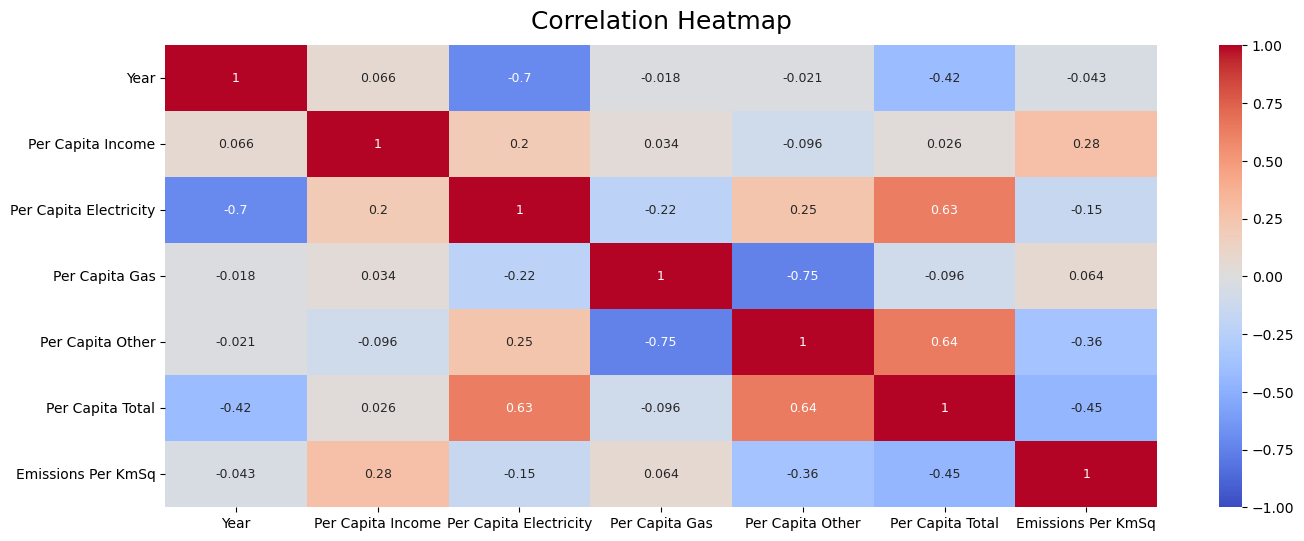

In [60]:
import seaborn as sns
corr = combined_df_per_capita.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap="coolwarm", annot_kws={"fontsize": 9})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 18}, pad=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [65]:
desc = comb_df.describe()
desc.loc['skewness'] = comb_df.skew()
desc.loc["Kurtosis"] = comb_df.kurtosis()
desc

C:\Users\Geethu Sebastian\AppData\Local\Temp\ipykernel_26396\3083064635.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  desc.loc['skewness'] = comb_df.skew()
C:\Users\Geethu Sebastian\AppData\Local\Temp\ipykernel_26396\3083064635.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  desc.loc["Kurtosis"] = comb_df.kurtosis()


Year  Per Capita Income  Per Capita Electricity  \
count     2618.000000        2618.000000             2618.000000   
mean      2018.000000       21032.301553                0.423269   
std          2.000382       12480.480678                0.134104   
min       2015.000000       12132.287000                0.215000   
25%       2016.000000       16855.801250                0.328000   
50%       2018.000000       19130.908500                0.388000   
75%       2020.000000       22349.924750                0.489000   
max       2021.000000      263504.063000                1.556000   
skewness     0.000000          13.070633                1.851759   
Kurtosis    -1.250095         213.984330                6.825405   

          Per Capita Gas  Per Capita Other  Per Capita Total  \
count        2618.000000       2618.000000       2618.000000   
mean            0.900772          0.200511          1.524471   
std             0.224988          0.294337          0.249874   
min             0.001000          0.003000          0.701000   
25%             0.819000          0.033000          1.361250   
50%             0.935000          0.092000          1.503500   
75%             1.050000          0.253750          1.674000   
max             1.401000          1.885000          2.518000   
skewness       -1.640180          3.019297          0.421921   
Kurtosis        3.980653         10.396125          0.607359   

          Emissions Per KmSq  
count            2618.000000  
mean             1977.824783  
std              2790.270870  
min                15.153000  
25%               289.212250  
50%               815.360000  
75%              2700.340250  
max             24097.687000  
skewness            2.933920  
Kurtosis           11.448448

Identifying income groups

In [61]:
def get_income_group(year):
    data = pd.DataFrame(combined_df_per_capita[combined_df_per_capita['Year']==year])
    income_percentiles = data['Per Capita Income'].rank(pct=True)
    conditions = [
        (income_percentiles >= 0.80),  # Super High Income
        (income_percentiles >= 0.60) & (income_percentiles < 0.80),  # High Income
        (income_percentiles >= 0.40) & (income_percentiles < 0.60),  # Medium Income
        (income_percentiles >= 0.20) & (income_percentiles < 0.40),  # Lower Income
        (income_percentiles < 0.20)  # Super Lower Income
    ]

    income_labels = ['Super Lower Income', 'Lower Income', 'Medium Income','High Income', 'Super High Income'  ]

    # Create a new column 'Income Group' based on the conditions
    data['Income Group'] = pd.cut(income_percentiles, bins=[0, 0.20, 0.40, 0.60, 0.80, 1.0], labels=income_labels)
    return data

comb_df = pd.DataFrame()
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021]
for year in years:
    new_df = get_income_group(year)
    comb_df = pd.concat([comb_df,new_df])
comb_df

Year           Country            Region Local Authority Code  \
0     2015           England        North East            E06000005   
1     2015           England        North East            E06000047   
2     2015           England        North East            E06000001   
3     2015           England        North East            E06000002   
4     2015           England        North East            E06000057   
...    ...               ...               ...                  ...   
2613  2021  Northern Ireland  Northern Ireland            N09000007   
2614  2021  Northern Ireland  Northern Ireland            N09000008   
2615  2021  Northern Ireland  Northern Ireland            N09000009   
2616  2021  Northern Ireland  Northern Ireland            N09000010   
2617  2021  Northern Ireland  Northern Ireland            N09000011   

              Local Authority  Per Capita Income  Per Capita Electricity  \
0                  Darlington          15262.275                   0.572   
1               County Durham          15235.652                   0.548   
2                  Hartlepool          14669.477                   0.538   
3               Middlesbrough          14418.983                   0.512   
4              Northumberland          18131.963                   0.644   
...                       ...                ...                     ...   
2613  Lisburn and Castlereagh          19219.947                   0.315   
2614      Mid and East Antrim          17767.939                   0.333   
2615               Mid Ulster          17496.912                   0.320   
2616   Newry, Mourne and Down          17274.946                   0.326   
2617      Ards and North Down          19105.520                   0.337   

      Per Capita Gas  Per Capita Other  Per Capita Total  Emissions Per KmSq  \
0              1.102             0.133             1.807             973.159   
1              1.101             0.310             1.960             451.854   
2              1.053             0.109             1.700            1600.430   
3              1.013             0.083             1.608            4127.837   
4              0.982             0.401             2.028             126.137   
...              ...               ...               ...                 ...   
2613           0.435             1.223             1.973             577.009   
2614           0.315             1.412             2.060             270.071   
2615           0.010             1.455             1.785             137.311   
2616           0.068             1.496             1.890             204.853   
2617           0.568             1.258             2.162             625.384   

            Income Group  
0     Super Lower Income  
1     Super Lower Income  
2     Super Lower Income  
3     Super Lower Income  
4          Medium Income  
...                  ...  
2613        Lower Income  
2614        Lower Income  
2615  Super Lower Income  
2616  Super Lower Income  
2617        Lower Income  

[2618 rows x 12 columns]

In [62]:
comb_df.to_csv("CombinedDoc.csv", index=False)

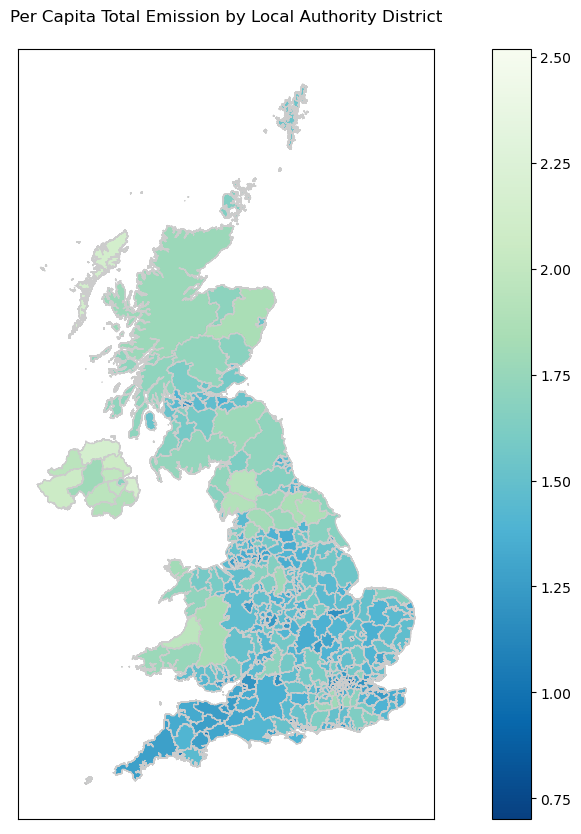

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load a shapefile for the UK local authority districts
map_data = gpd.read_file('LAD_DEC_2022_UK_BFC_V2.shp')

# Merge map data with emissions data
merged_data = pd.merge(map_data, comb_df, how='inner', left_on='LAD22CD', right_on='Local Authority Code')
                       
# Create a choropleth map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_data.plot(column='Per Capita Total', cmap='GnBu_r', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_xticks([])
ax.set_yticks([])

# Add some space after the title
plt.title('Per Capita Total Emission by Local Authority District', pad=20)
plt.savefig('UK map.png')
plt.show()


bar plots

"Income Group Vs Electricity_Per_Capita"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


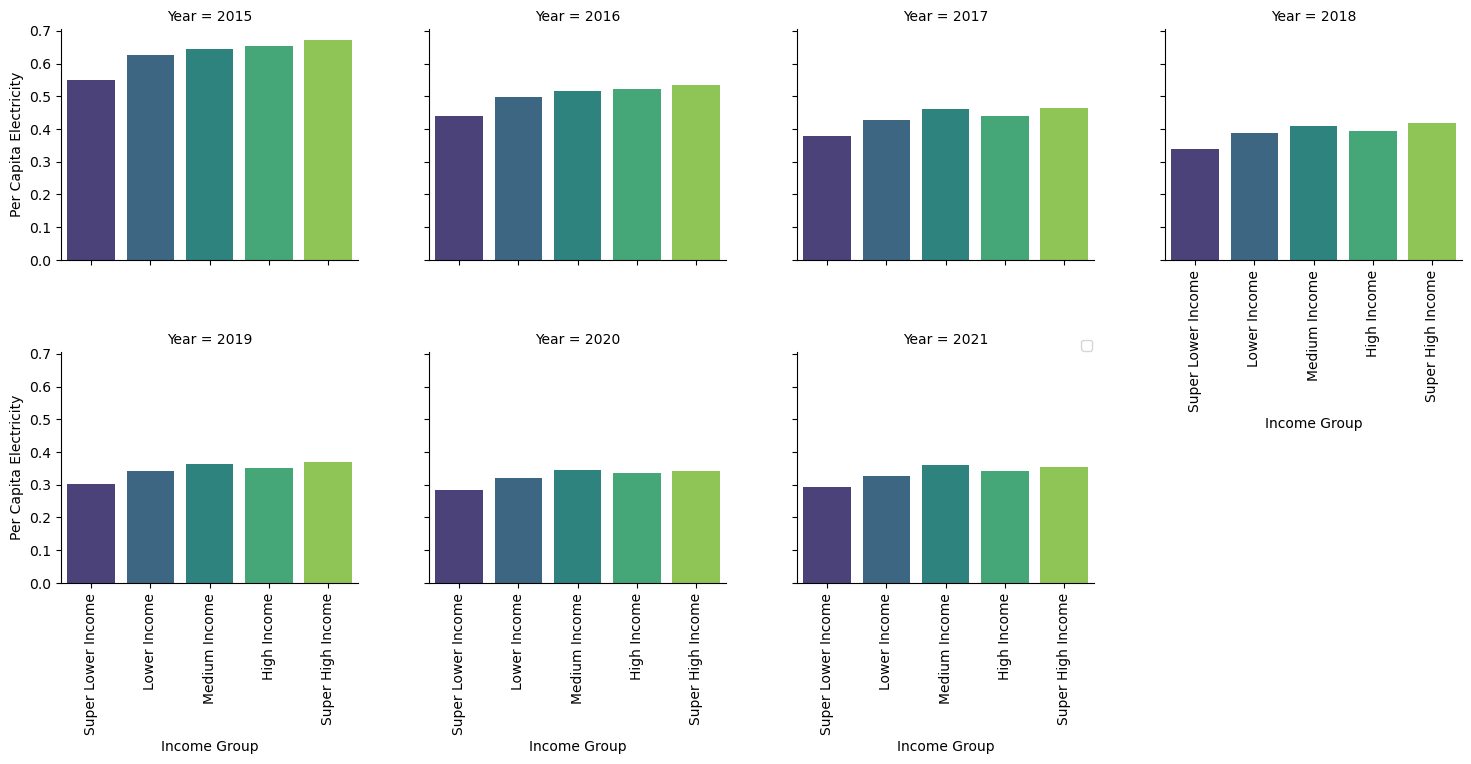

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(comb_df, col="Year", height=6, aspect=.7, col_wrap=4)
g.map(sns.barplot, "Income Group", "Per Capita Electricity", ci=None, palette="viridis")
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(15, 6) 
g.fig.subplots_adjust(hspace=.4)
plt.legend(bbox_to_anchor=(1, 1), loc='lower right', borderaxespad=0.1)
plt.show()

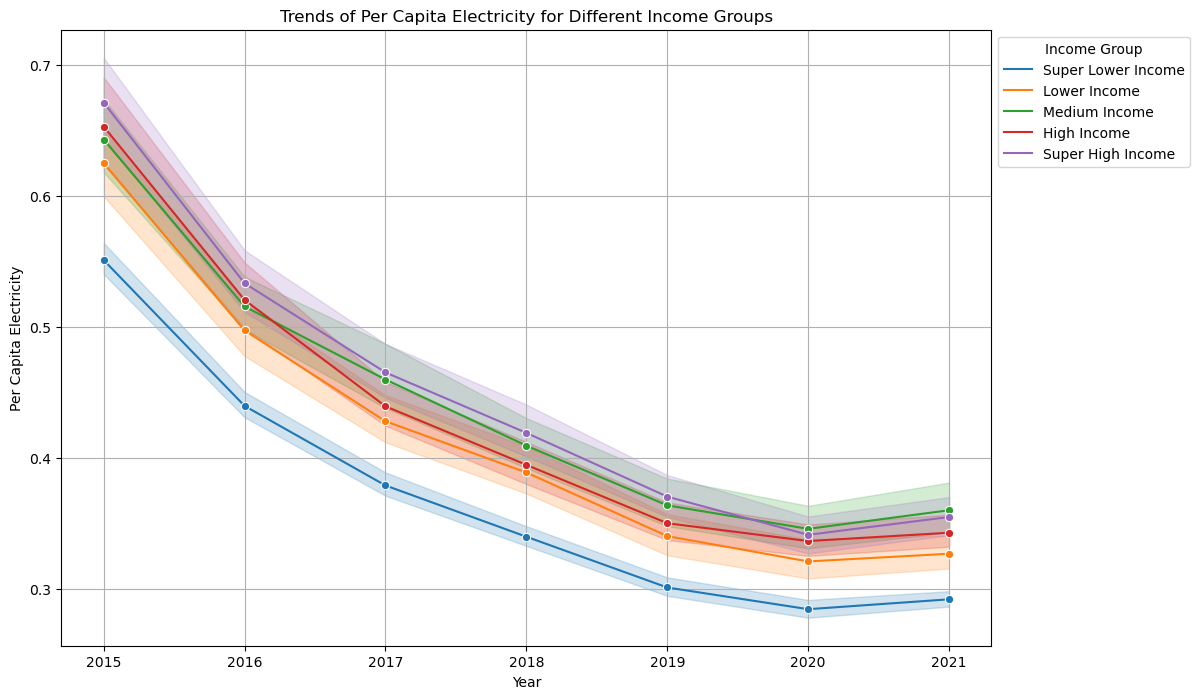

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming comb_df, "Year", "Income Group", and "Per Capita Electricity" are defined

# Plotting using Seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x="Year", y="Per Capita Electricity", hue="Income Group", data=comb_df, marker='o')

plt.title("Trends of Per Capita Electricity for Different Income Groups")
plt.xlabel("Year")
plt.ylabel("Per Capita Electricity")
plt.legend(title="Income Group", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

"Income Group Vs Gas_Per_Capita"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


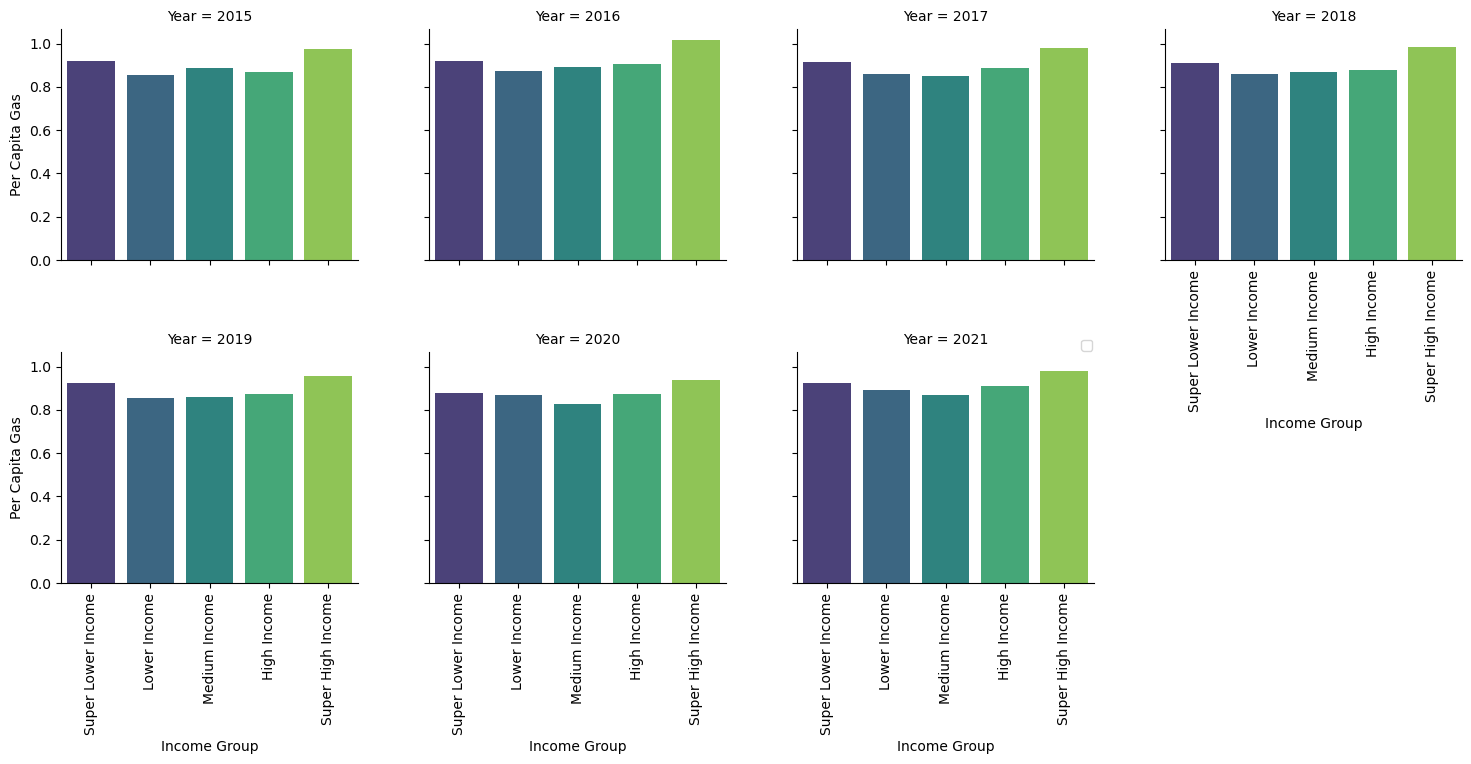

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(comb_df, col="Year", height=6, aspect=.7, col_wrap=4)
g.map(sns.barplot, "Income Group", "Per Capita Gas", ci=None, palette="viridis")
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(15, 6) 
g.fig.subplots_adjust(hspace=.4)
plt.legend(bbox_to_anchor=(1, 1), loc='lower right', borderaxespad=0.1)
plt.show()

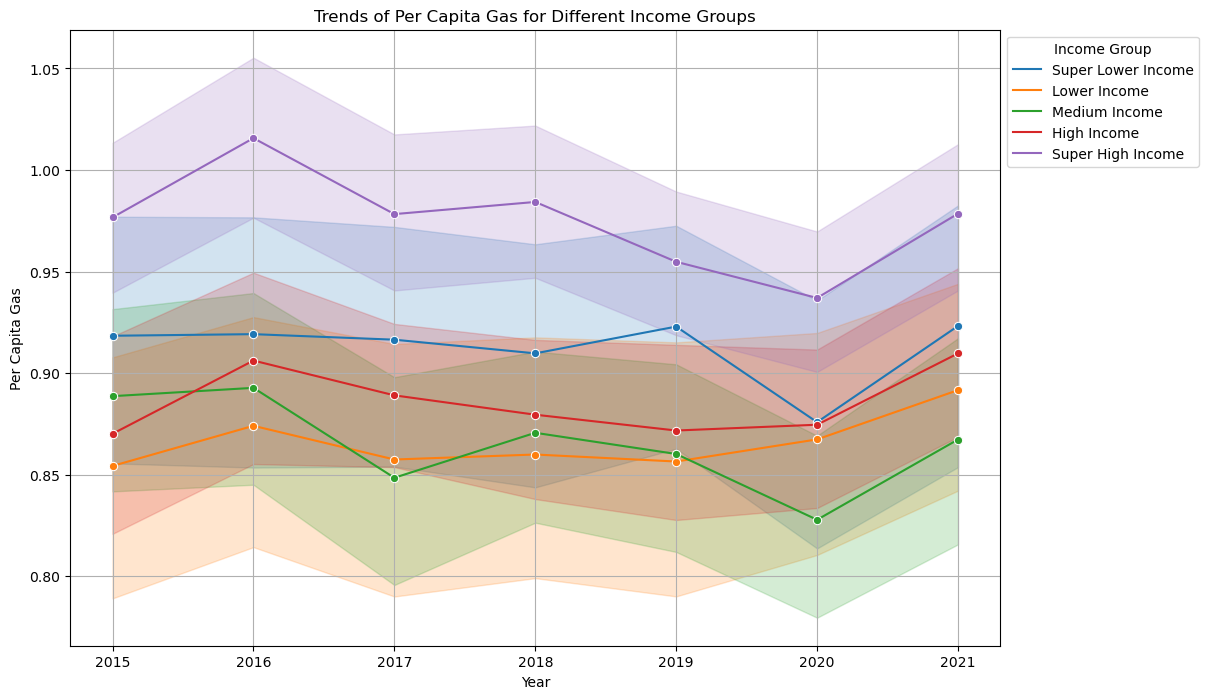

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming comb_df, "Year", "Income Group", and "Per Capita Electricity" are defined

# Plotting using Seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x="Year", y="Per Capita Gas", hue="Income Group", data=comb_df, marker='o')

plt.title("Trends of Per Capita Gas for Different Income Groups")
plt.xlabel("Year")
plt.ylabel("Per Capita Gas")
plt.legend(title="Income Group", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

"Income Group Vs Other_Per_Capita"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


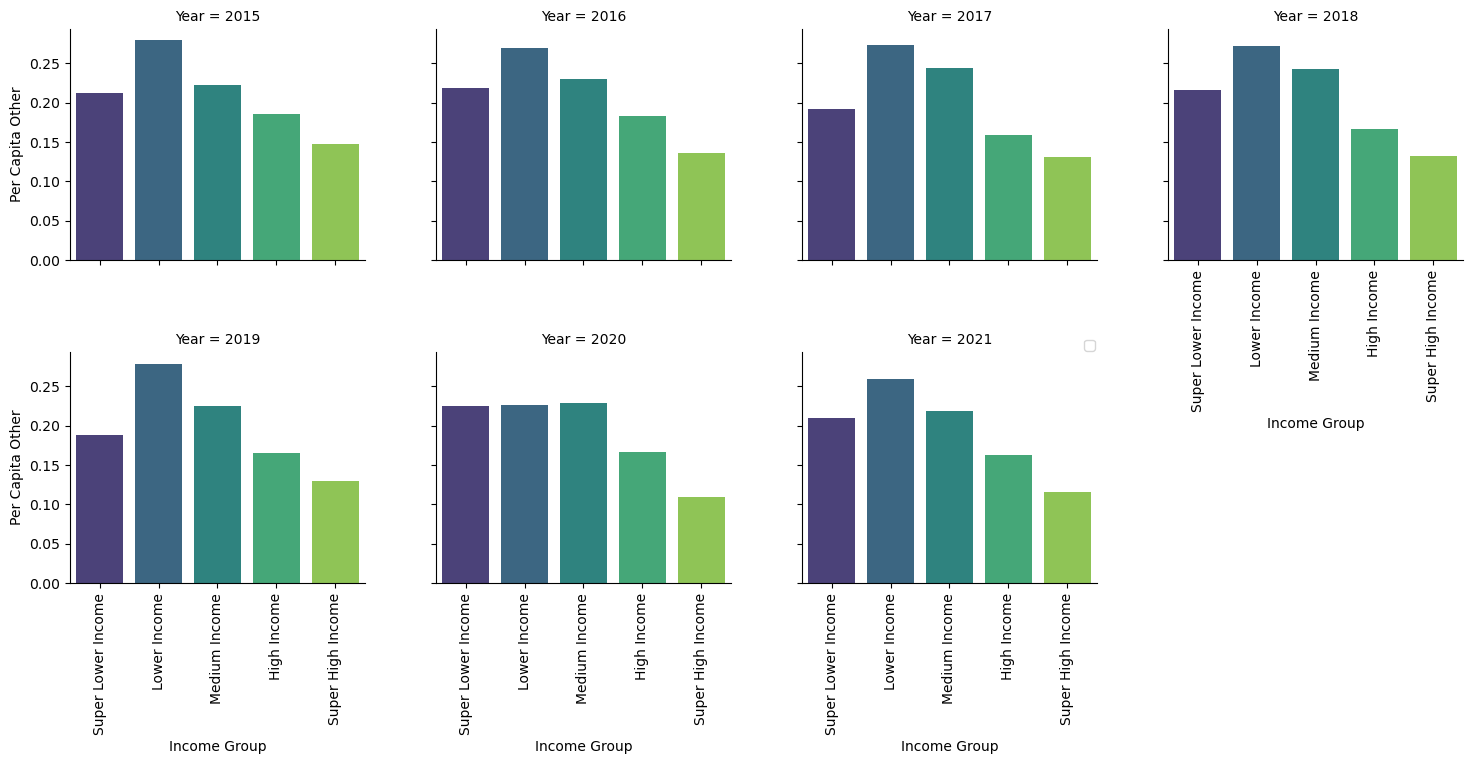

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(comb_df, col="Year", height=6, aspect=.7, col_wrap=4)
g.map(sns.barplot, "Income Group", "Per Capita Other", ci=None, palette="viridis")
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(15, 6) 
g.fig.subplots_adjust(hspace=.4)
plt.legend(bbox_to_anchor=(1, 1), loc='lower right', borderaxespad=0.1)
plt.show()

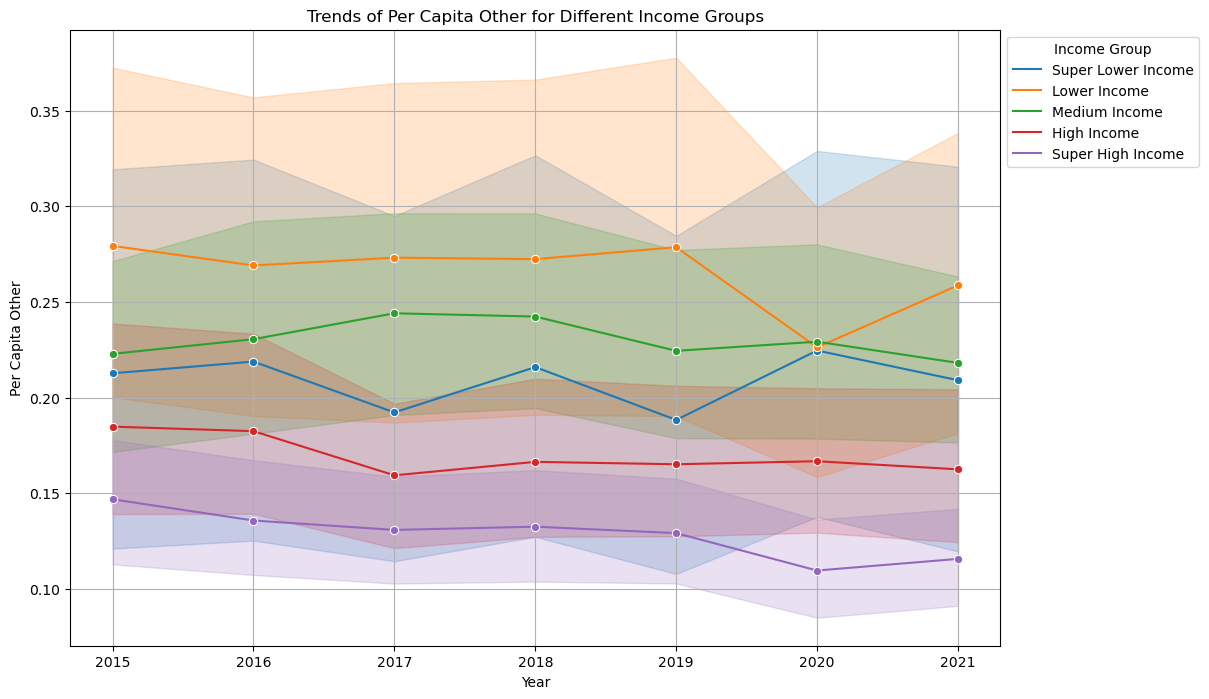

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming comb_df, "Year", "Income Group", and "Per Capita Electricity" are defined

# Plotting using Seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x="Year", y="Per Capita Other", hue="Income Group", data=comb_df, marker='o')

plt.title("Trends of Per Capita Other for Different Income Groups")
plt.xlabel("Year")
plt.ylabel("Per Capita Other")
plt.legend(title="Income Group", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

"Income Group Vs Total_Per_Capita"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


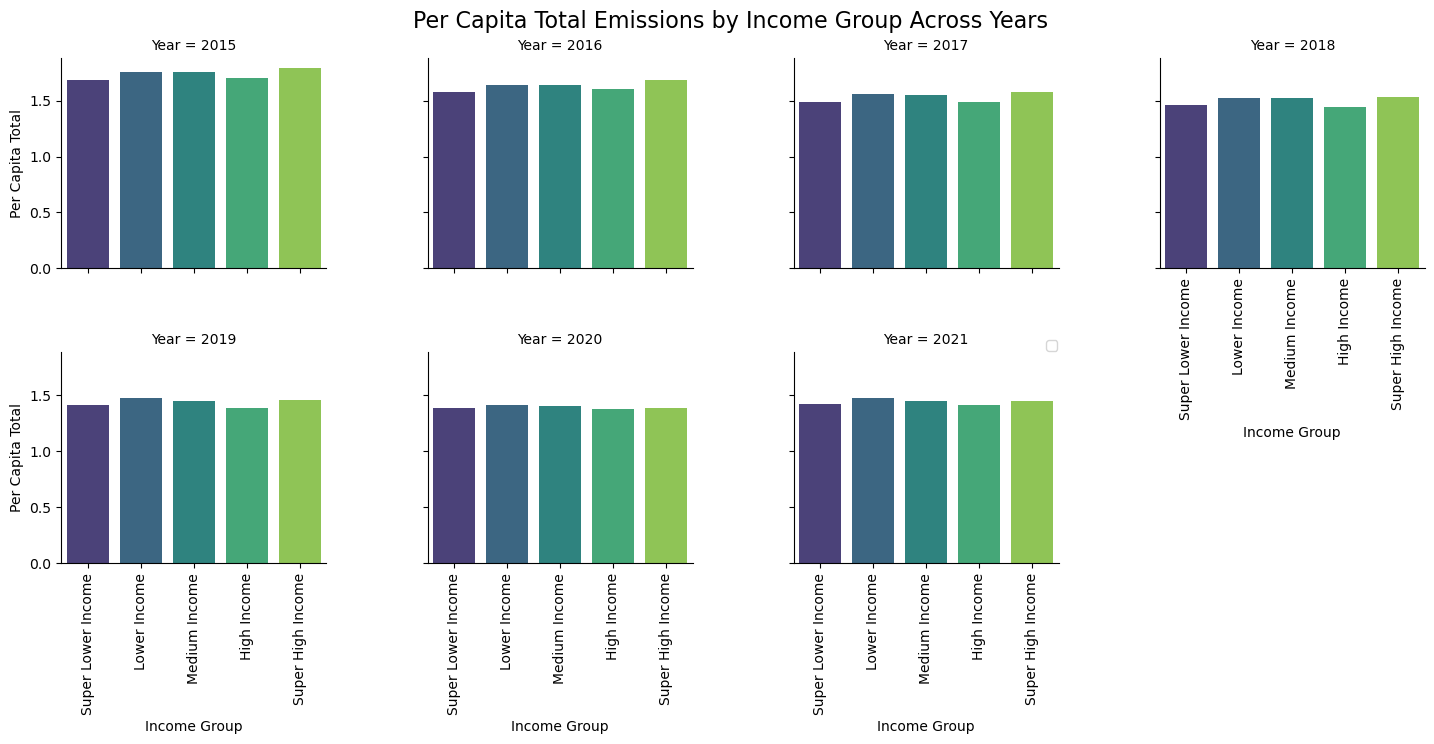

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.FacetGrid(comb_df, col="Year", height=5, aspect=.7, col_wrap=4)
g.map(sns.barplot, "Income Group", "Per Capita Total", ci=None, palette="viridis")
g.fig.suptitle('Per Capita Total Emissions by Income Group Across Years', fontsize=16)
g.set_xticklabels(rotation=90)
g.fig.set_size_inches(15, 6) 
g.fig.subplots_adjust(hspace=.4,top=0.9)
plt.legend(bbox_to_anchor=(1, 1), loc='lower right', borderaxespad=0.1)
plt.show()

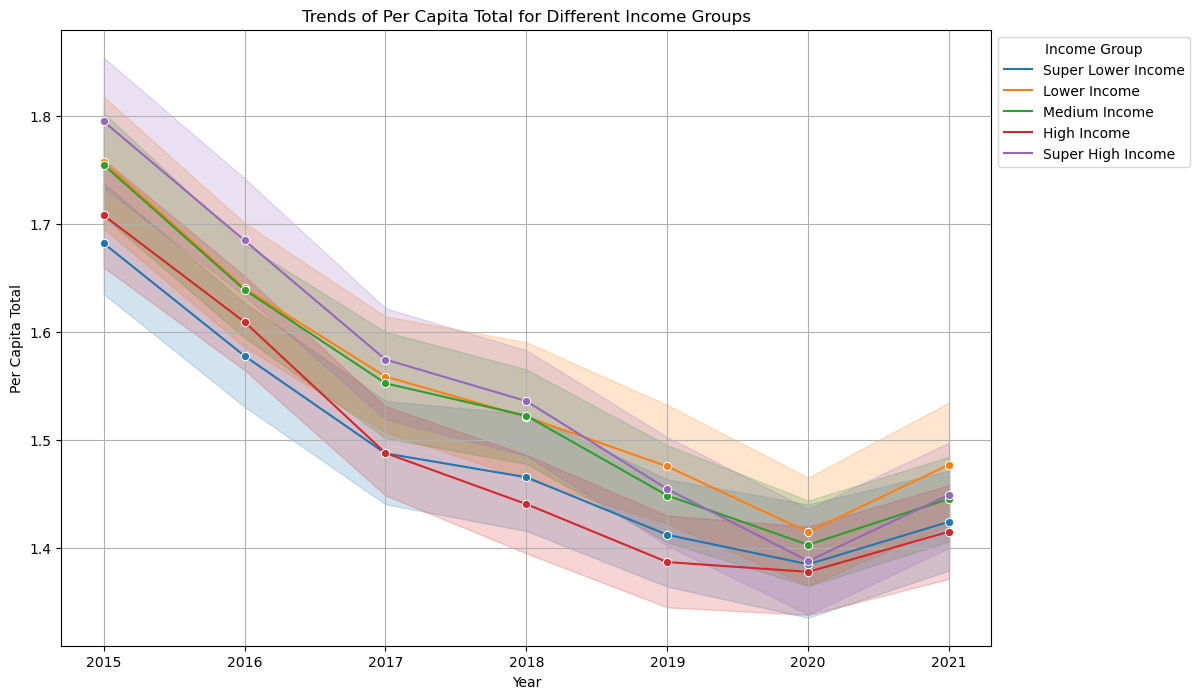

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming comb_df, "Year", "Income Group", and "Per Capita Electricity" are defined

# Plotting using Seaborn's lineplot
plt.figure(figsize=(12, 8))
sns.lineplot(x="Year", y="Per Capita Total", hue="Income Group", data=comb_df, marker='o')

plt.title("Trends of Per Capita Total for Different Income Groups")
plt.xlabel("Year")
plt.ylabel("Per Capita Total")
plt.legend(title="Income Group", bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

Scatter Diagram - 'Income_Per_Capita' Vs 'Electricity_Per_Capita'

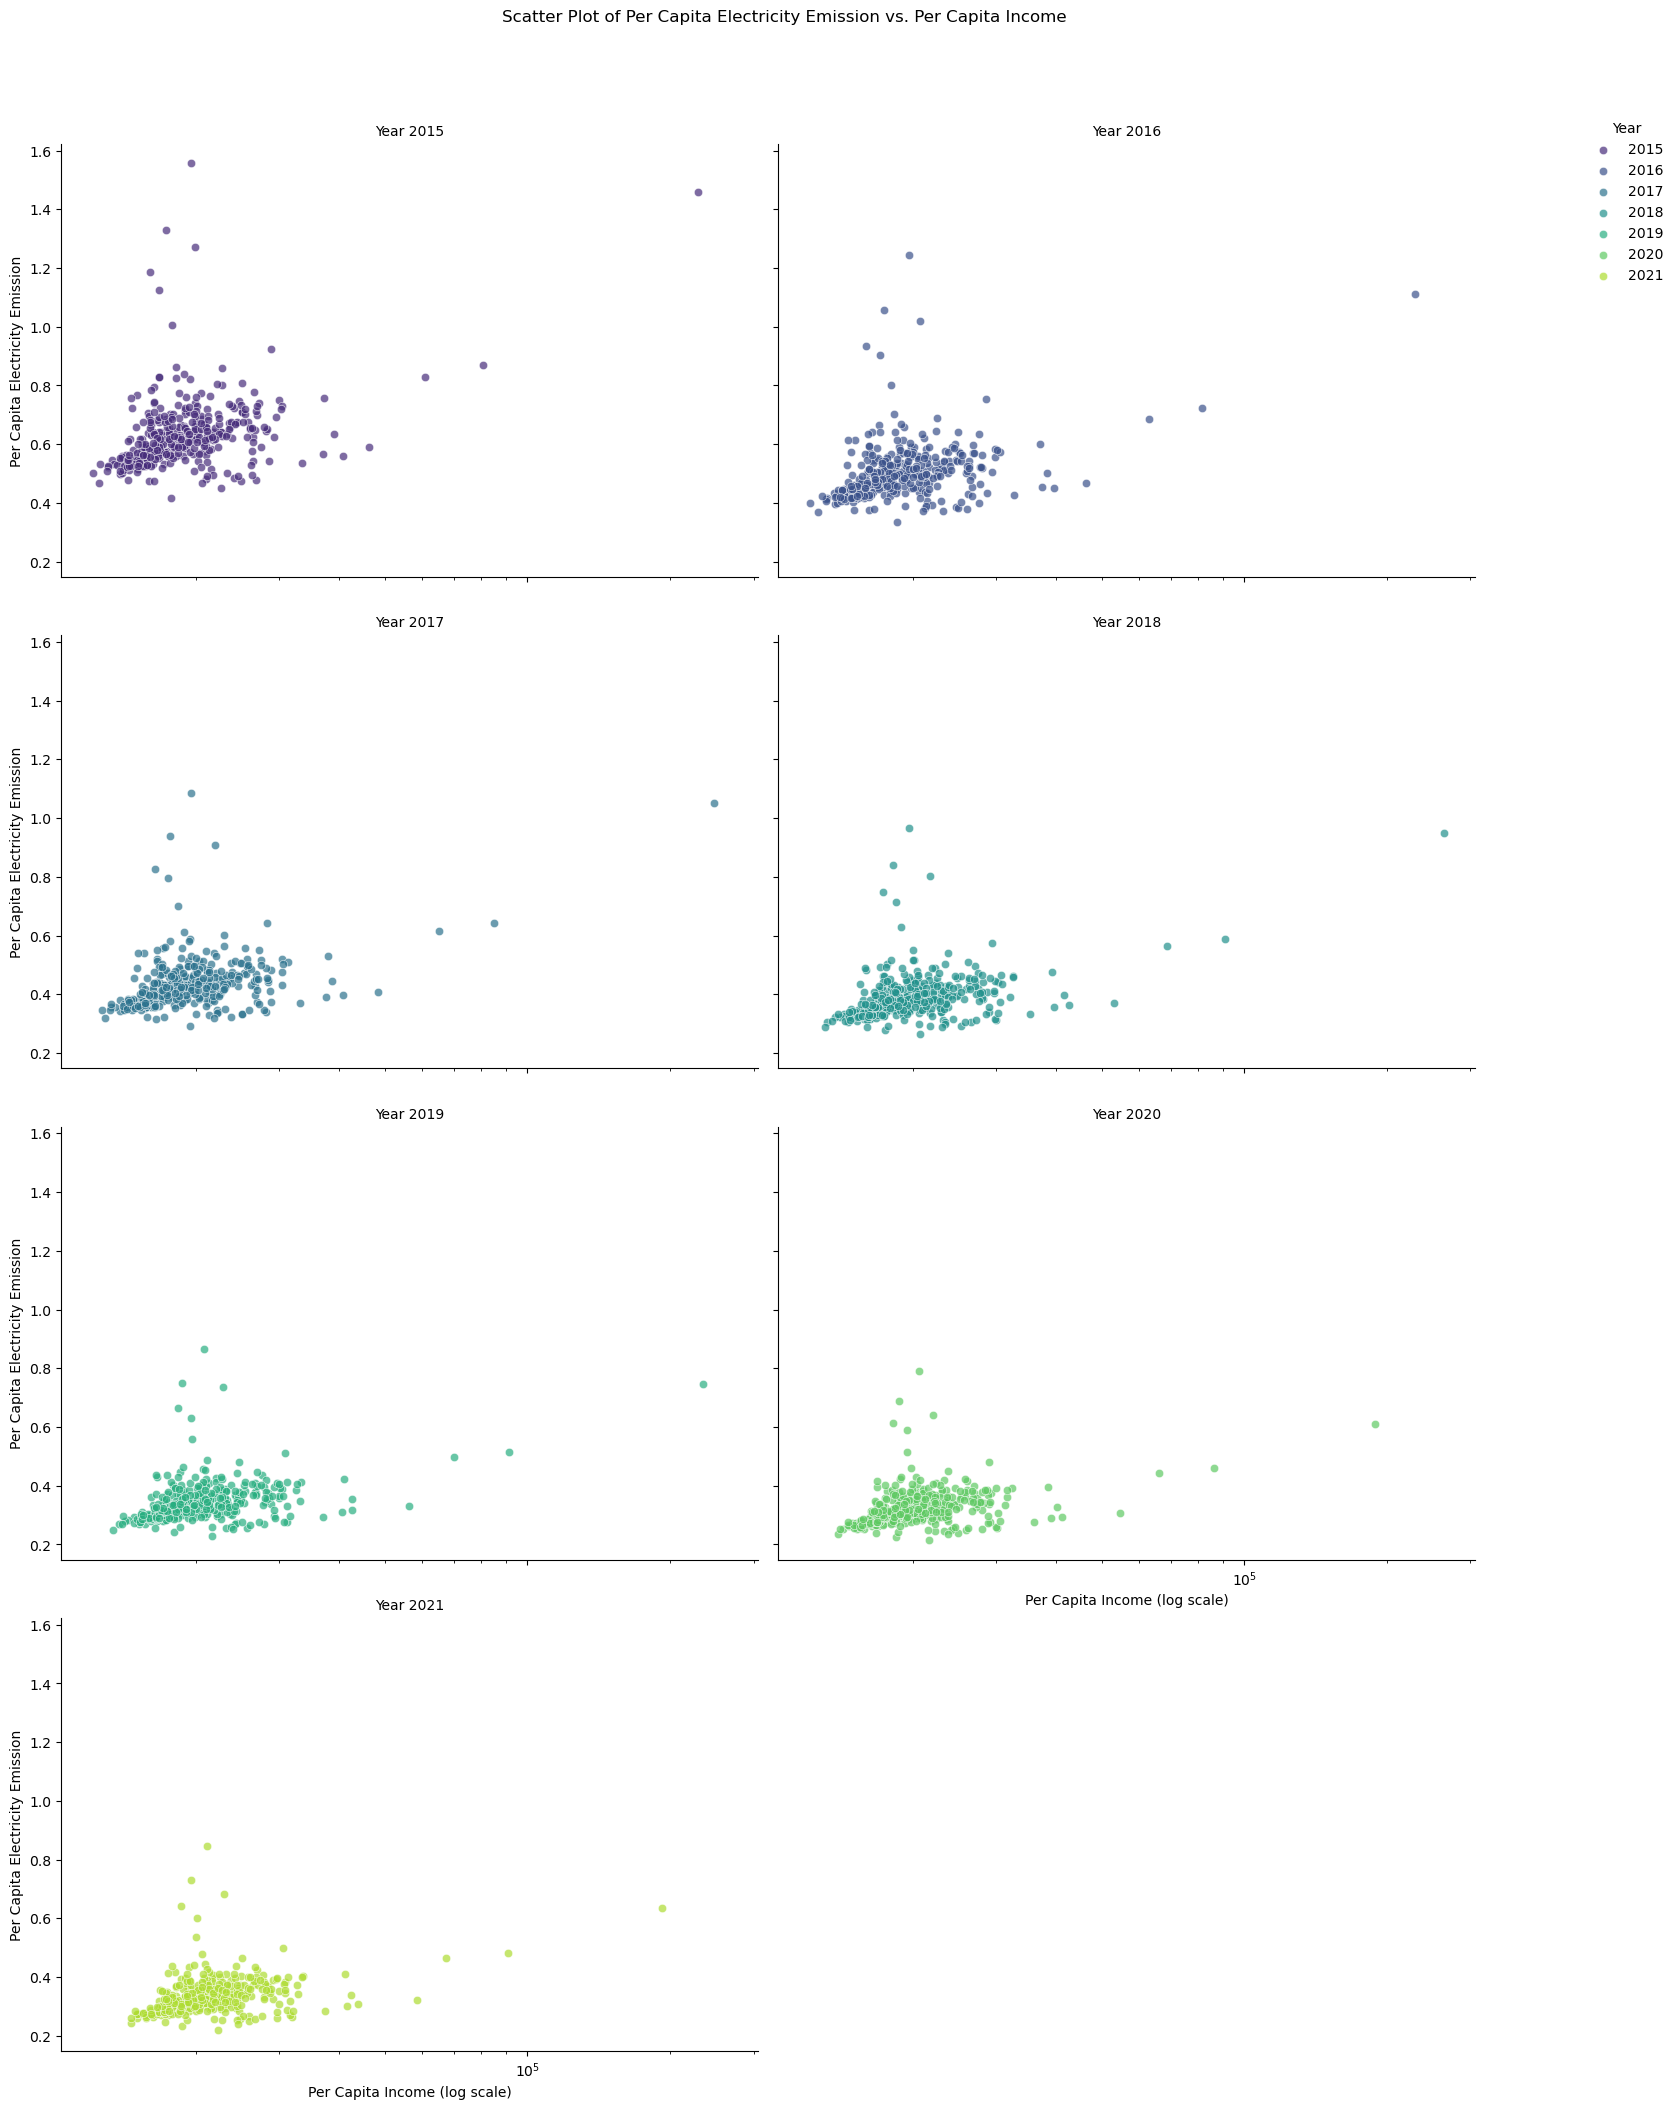

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting using Seaborn's FacetGrid
g = sns.FacetGrid(comb_df, col='Year', col_wrap=2, height=5, aspect=1.5, hue='Year', palette='viridis')
g.map(sns.scatterplot, 'Per Capita Income', 'Per Capita Electricity', alpha=0.7)
g.add_legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')

# Set titles and labels
g.set_titles('Year {col_name}')
g.set_xlabels('Per Capita Income (log scale)')
g.set_ylabels('Per Capita Electricity Emission')

# Use a logarithmic scale for the x-axis
g.set(xscale="log")


plt.suptitle('Scatter Plot of Per Capita Electricity Emission vs. Per Capita Income', y=1.05)
plt.savefig('Electricity_scatter_plot_log.png')
plt.show()


Scatter Diagram - 'Income_Per_Capita' Vs 'Gas_Per_Capita'

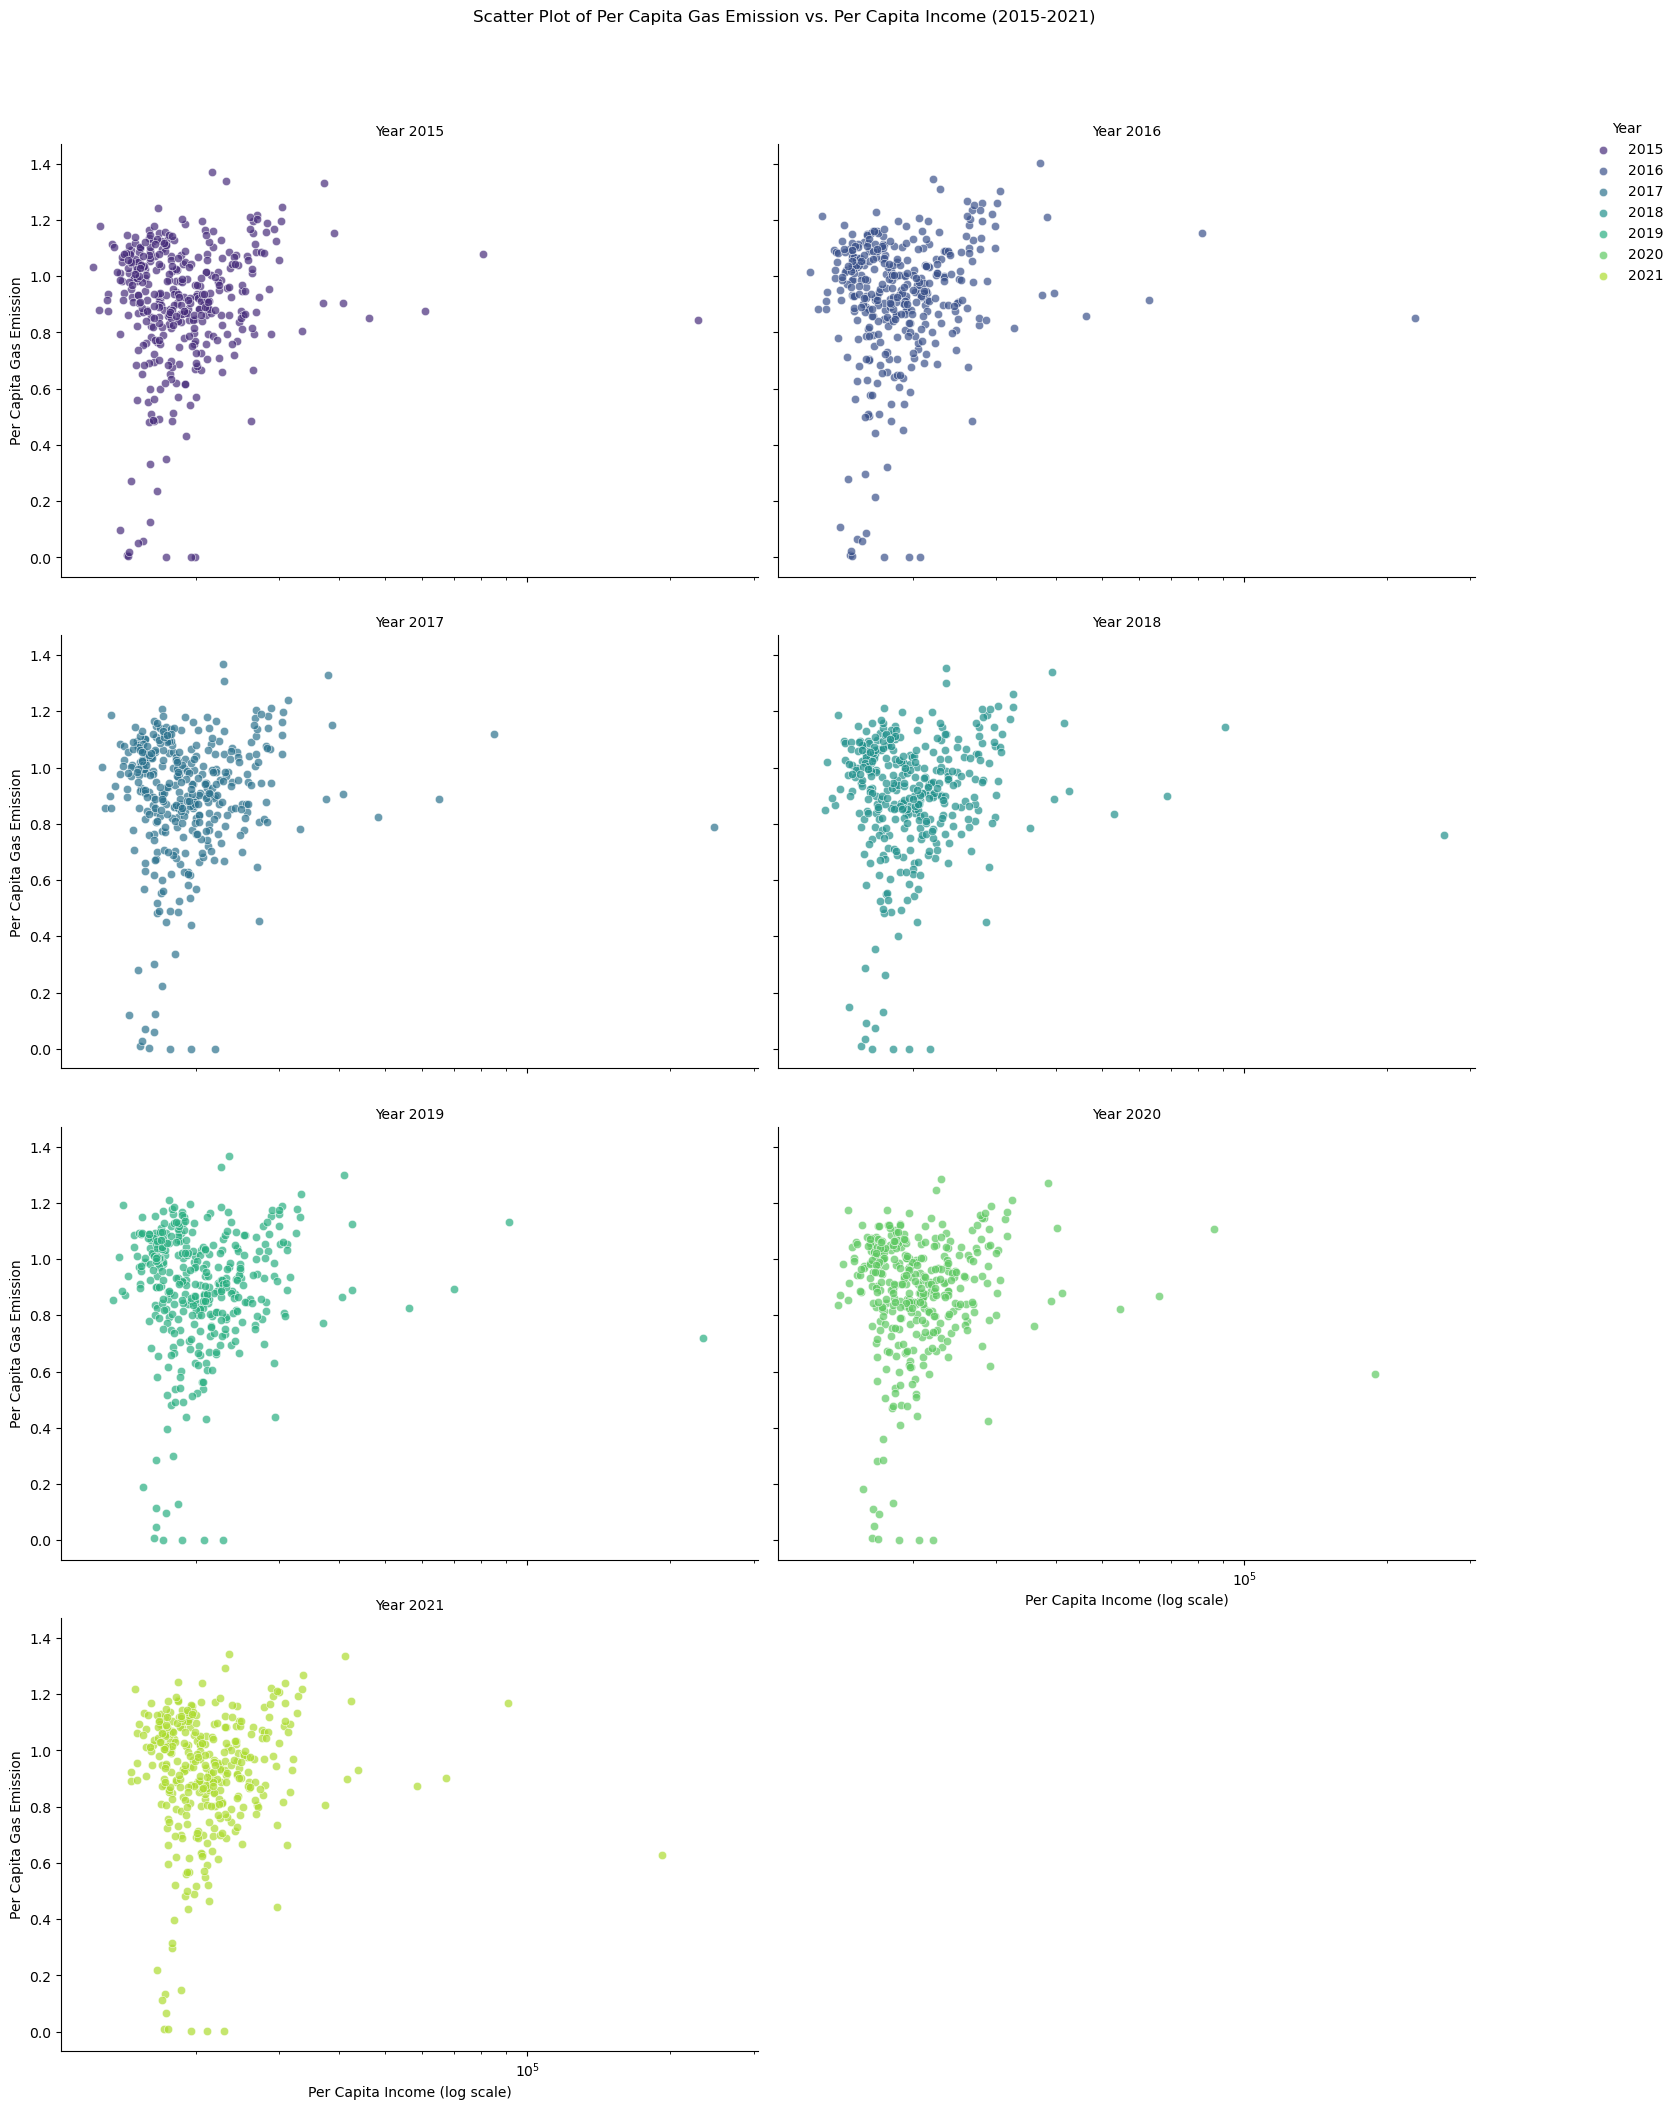

In [76]:
# Plotting using Seaborn's FacetGrid
g = sns.FacetGrid(comb_df, col='Year', col_wrap=2, height=5, aspect=1.5, hue='Year', palette='viridis')
g.map(sns.scatterplot, 'Per Capita Income', 'Per Capita Gas', alpha=0.7)
g.add_legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')

# Set titles and labels
g.set_titles('Year {col_name}')
g.set_xlabels('Per Capita Income (log scale)')
g.set_ylabels('Per Capita Gas Emission')

# Use a logarithmic scale for the x-axis
g.set(xscale="log")


plt.suptitle('Scatter Plot of Per Capita Gas Emission vs. Per Capita Income (2015-2021)', y=1.05)
plt.savefig('gas_scatter_plot_log.png')
plt.show()


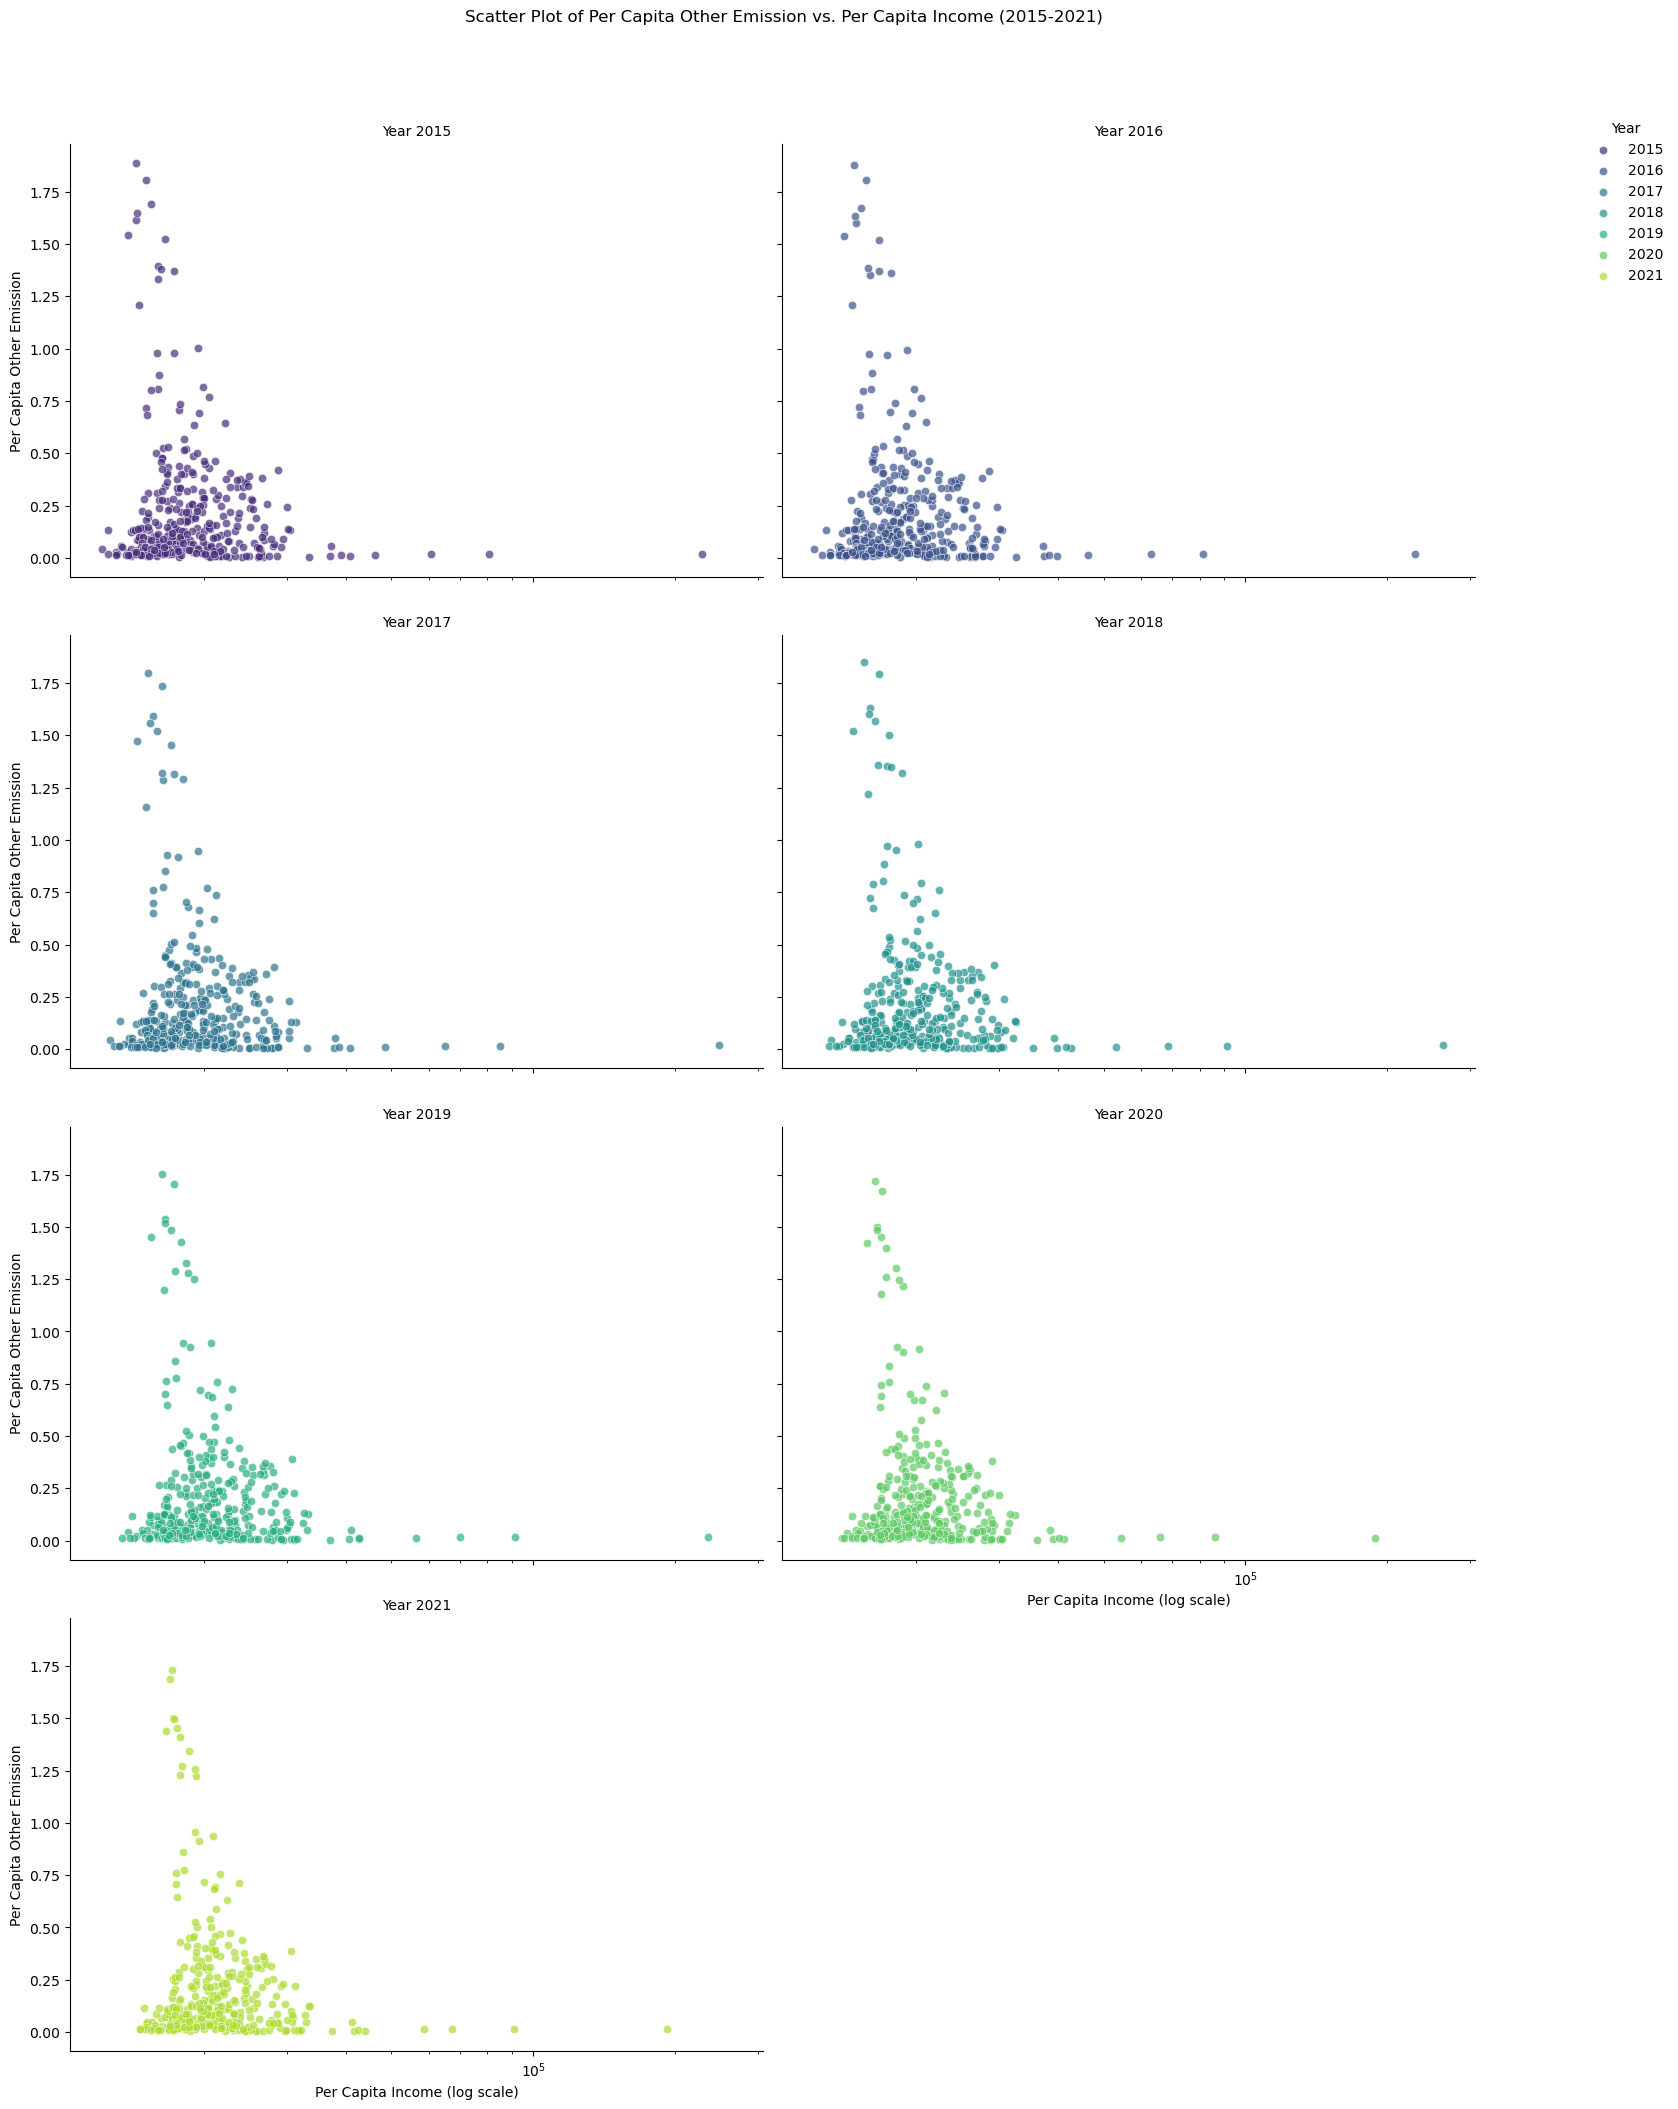

In [77]:
# Plotting using Seaborn's FacetGrid
g = sns.FacetGrid(comb_df, col='Year', col_wrap=2, height=5, aspect=1.5, hue='Year', palette='viridis')
g.map(sns.scatterplot, 'Per Capita Income', 'Per Capita Other', alpha=0.7)
g.add_legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')

# Set titles and labels
g.set_titles('Year {col_name}')
g.set_xlabels('Per Capita Income (log scale)')
g.set_ylabels('Per Capita Other Emission')

# Use a logarithmic scale for the x-axis
g.set(xscale="log")


plt.suptitle('Scatter Plot of Per Capita Other Emission vs. Per Capita Income (2015-2021)', y=1.05)
plt.savefig('Other_scatter_plot_log.png')
plt.show()

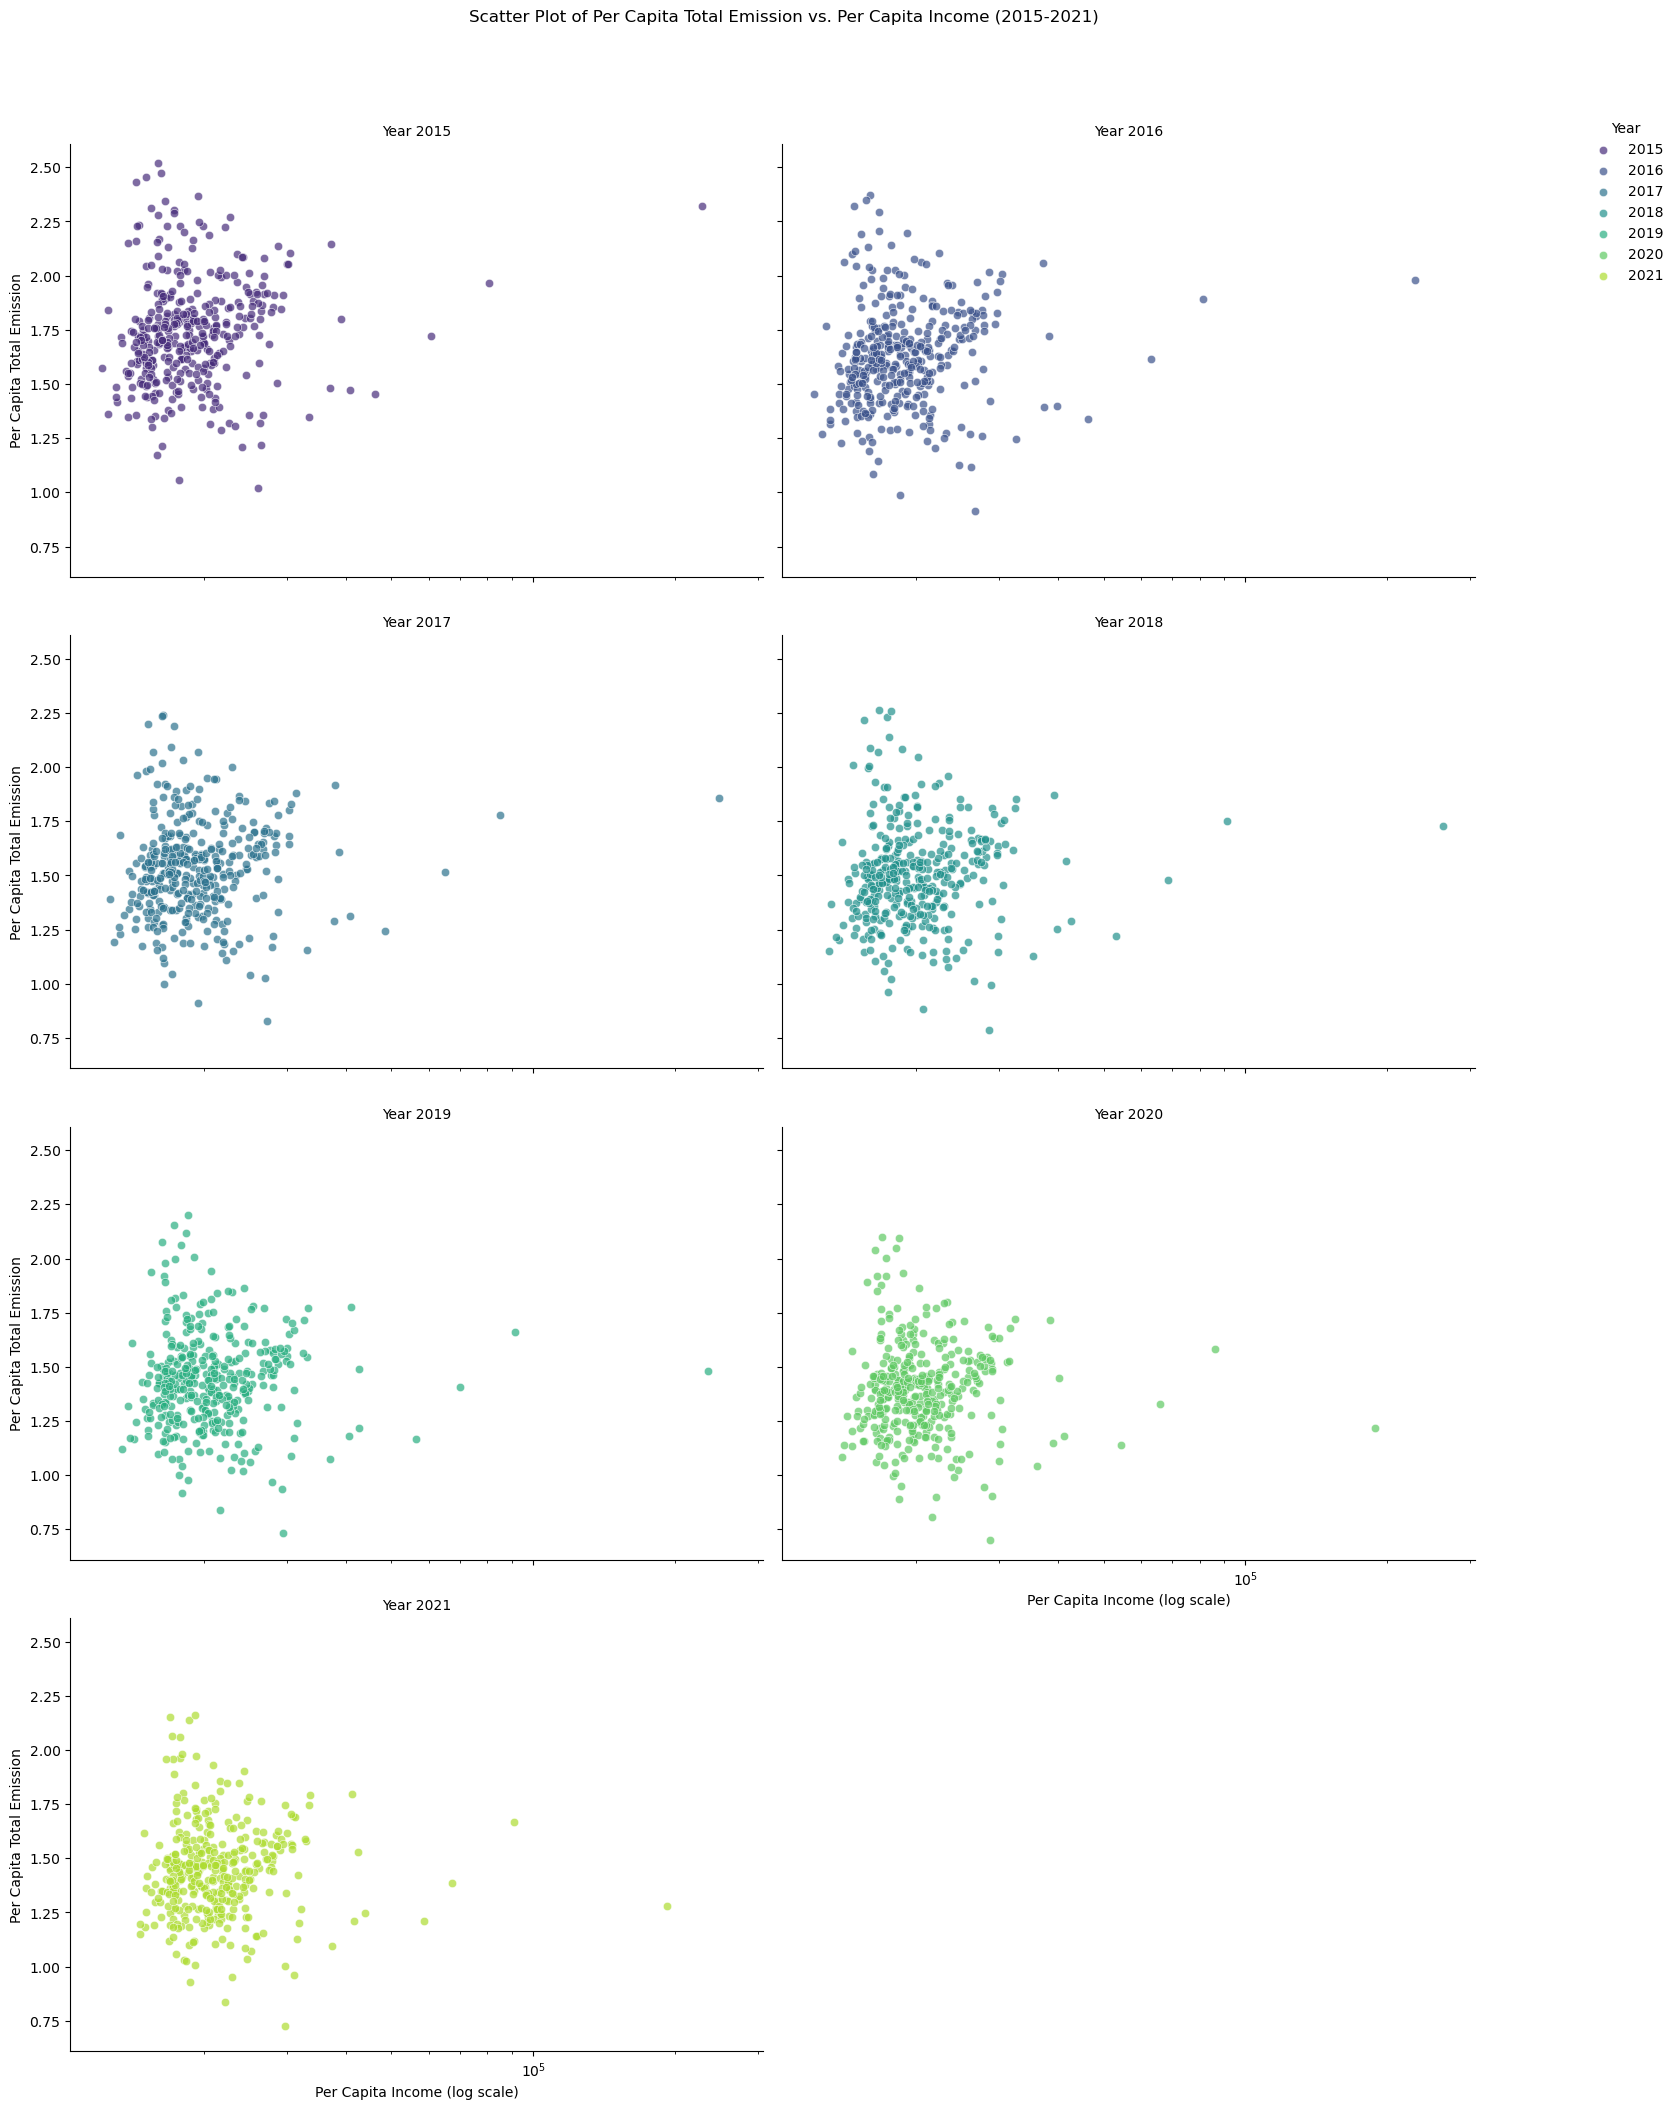

In [78]:
# Plotting using Seaborn's FacetGrid 
g = sns.FacetGrid(comb_df, col='Year', col_wrap=2, height=5, aspect=1.5, hue='Year', palette='viridis')
g.map(sns.scatterplot, 'Per Capita Income', 'Per Capita Total', alpha=0.7)
g.add_legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')

# Set titles and labels
g.set_titles('Year {col_name}')
g.set_xlabels('Per Capita Income (log scale)')
g.set_ylabels('Per Capita Total Emission')

# Use a logarithmic scale for the x-axis
g.set(xscale="log")


plt.suptitle('Scatter Plot of Per Capita Total Emission vs. Per Capita Income (2015-2021)', y=1.05)
plt.savefig('Total_scatter_plot_log.png')
plt.show()

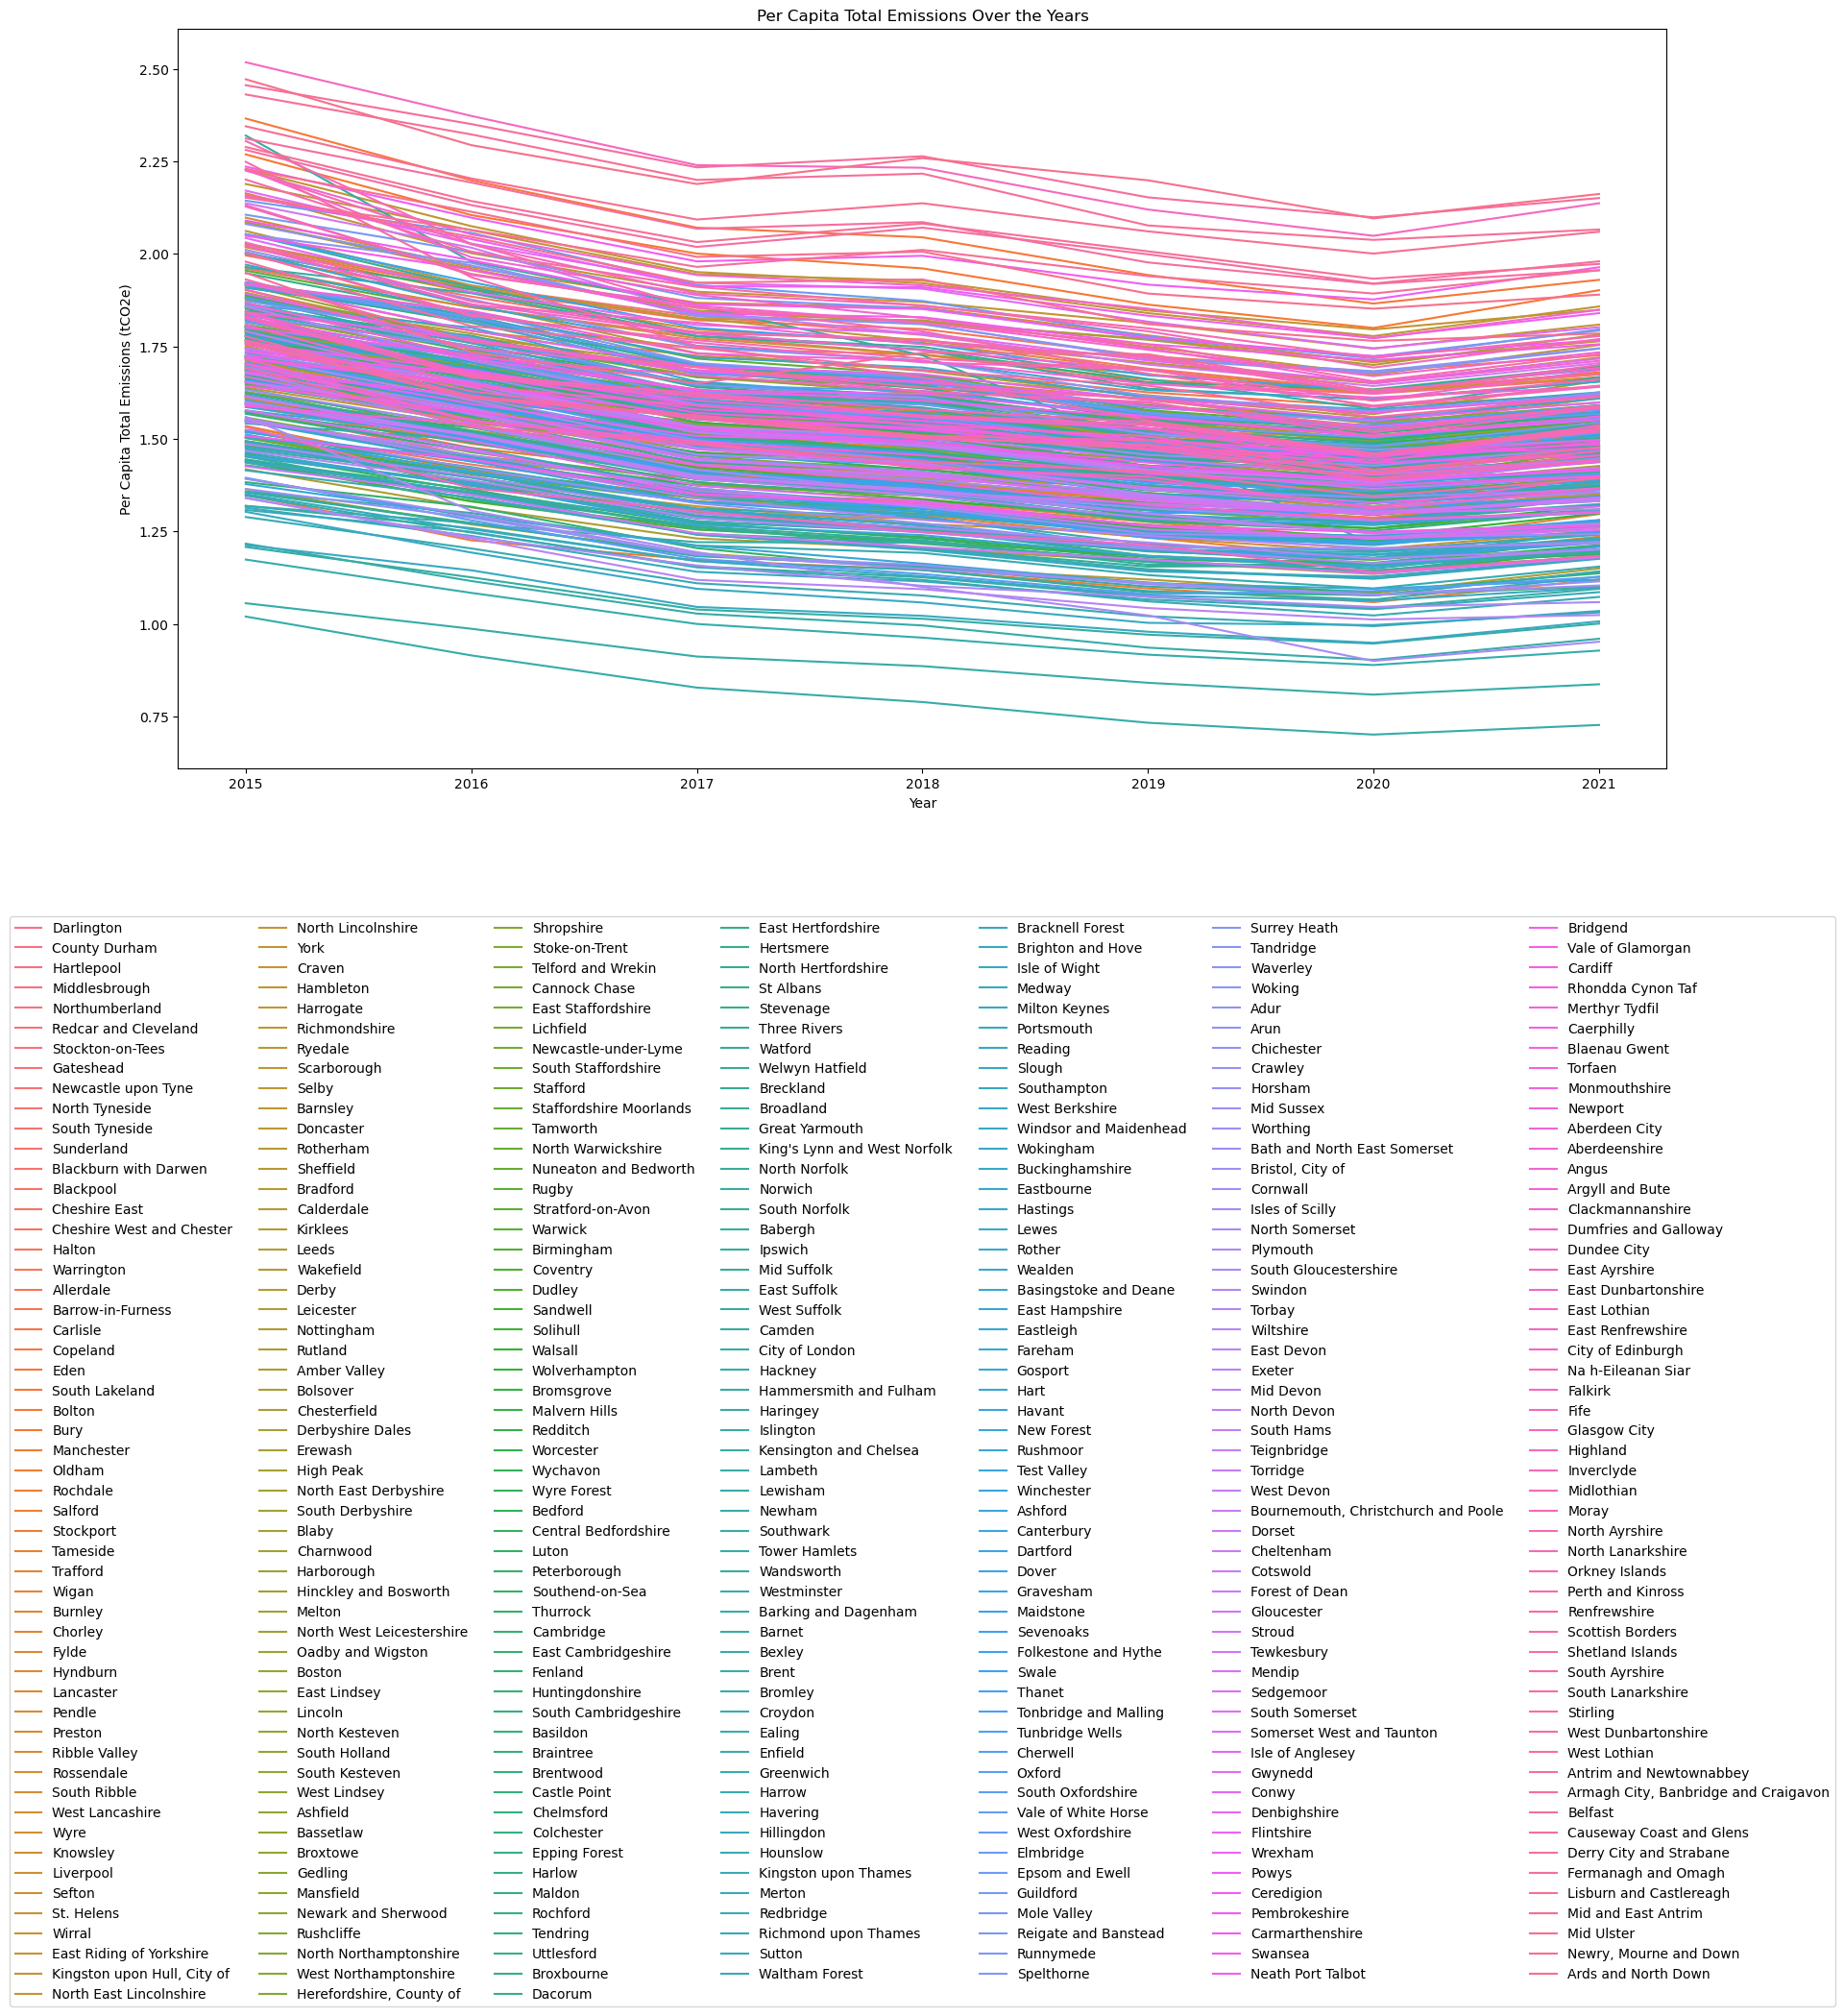

In [79]:
# Line plot of emissions over the years
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Per Capita Total', data=comb_df, hue='Local Authority')
plt.title('Per Capita Total Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Per Capita Total Emissions (tCO2e)')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=7, borderaxespad=0.)
plt.show()


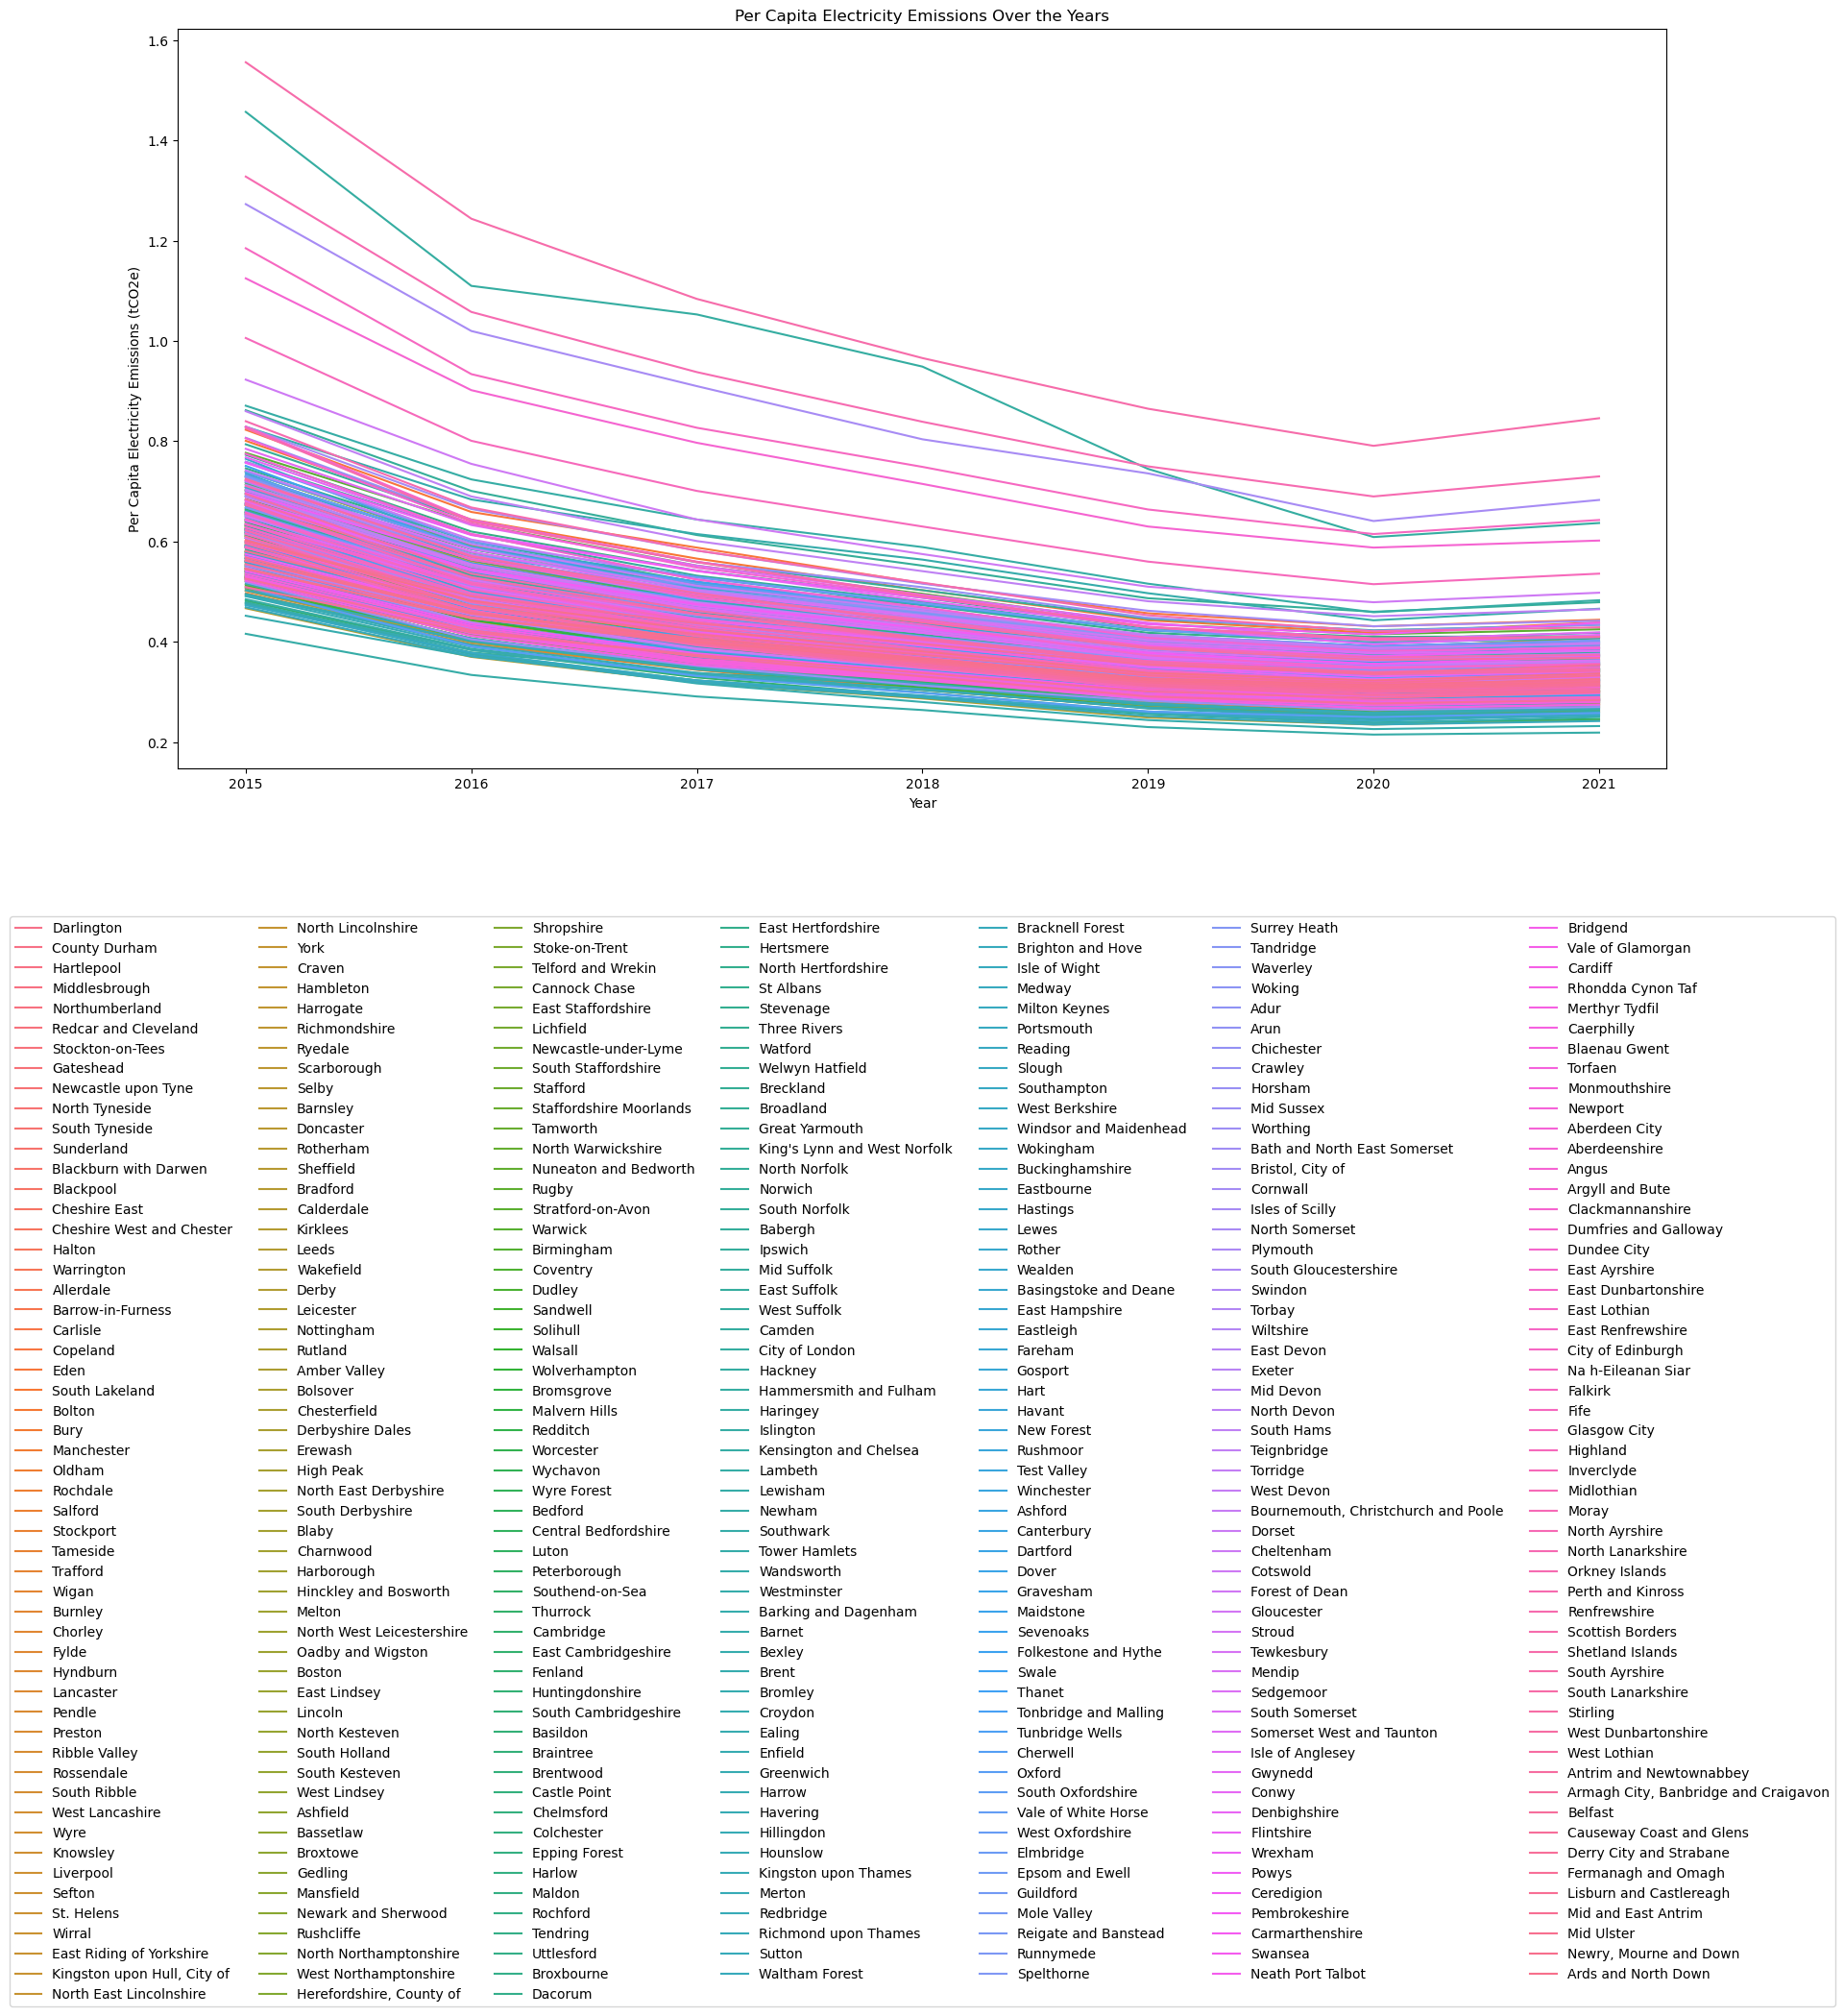

In [339]:
# Line plot of emissions over the years
plt.figure(figsize=(20, 10))
sns.lineplot(x='Year', y='Per Capita Electricity', data=comb_df, hue='Local Authority')
plt.title('Per Capita Electricity Emissions Over the Years')
plt.xlabel('Year')
plt.ylabel('Per Capita Electricity Emissions (tCO2e)')
plt.legend(bbox_to_anchor=(0.5, -0.2), loc="upper center", ncol=7, borderaxespad=0.)
plt.show()

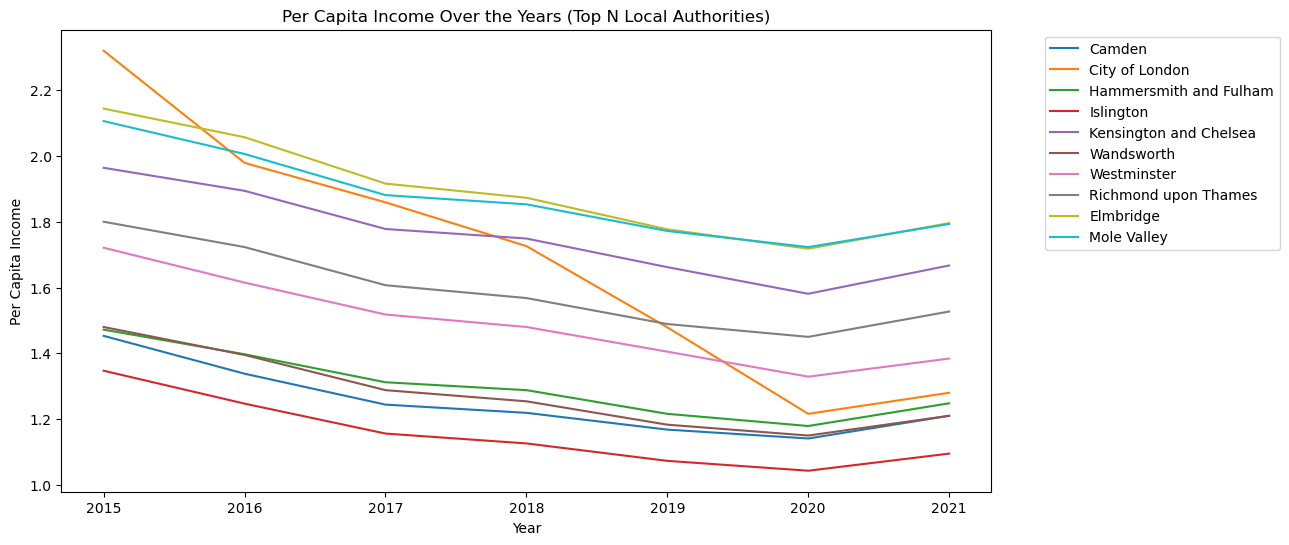

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the top N Local Authorities based on some criteria (e.g., total emissions)
top_n_local_authorities = comb_df.groupby('Local Authority')['Per Capita Income'].sum().nlargest(10).index

# Filter the DataFrame to include only the top N Local Authorities
filtered_df = comb_df[comb_df['Local Authority'].isin(top_n_local_authorities)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Per Capita Total', hue='Local Authority', data=filtered_df)

plt.title('Per Capita Income Over the Years (Top N Local Authorities)')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


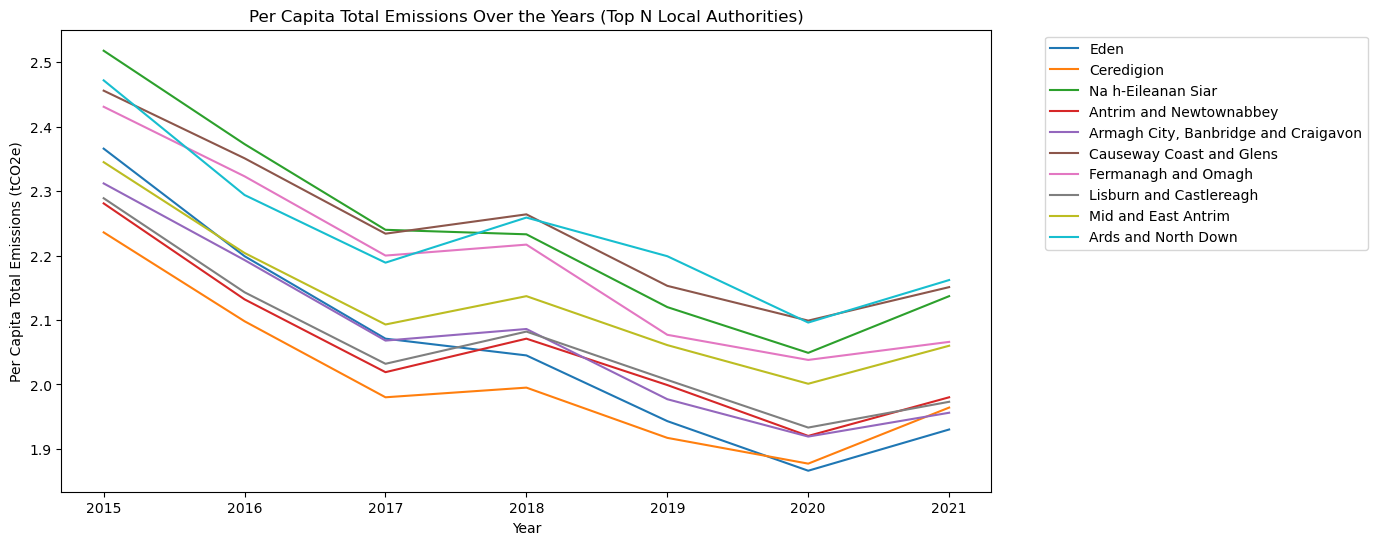

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the top N Local Authorities based on some criteria (e.g., total emissions)
top_n_local_authorities = comb_df.groupby('Local Authority')['Per Capita Total'].sum().nlargest(10).index

# Filter the DataFrame to include only the top N Local Authorities
filtered_df = comb_df[comb_df['Local Authority'].isin(top_n_local_authorities)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Per Capita Total', hue='Local Authority', data=filtered_df)

plt.title('Per Capita Total Emissions Over the Years (Top N Local Authorities)')
plt.xlabel('Year')
plt.ylabel('Per Capita Total Emissions (tCO2e)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


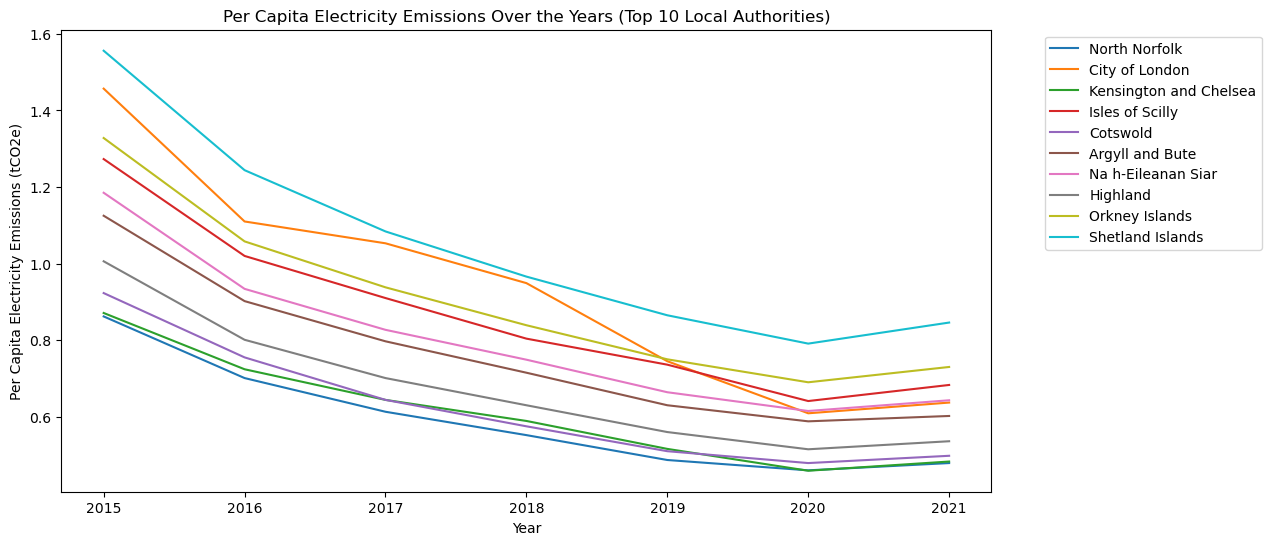

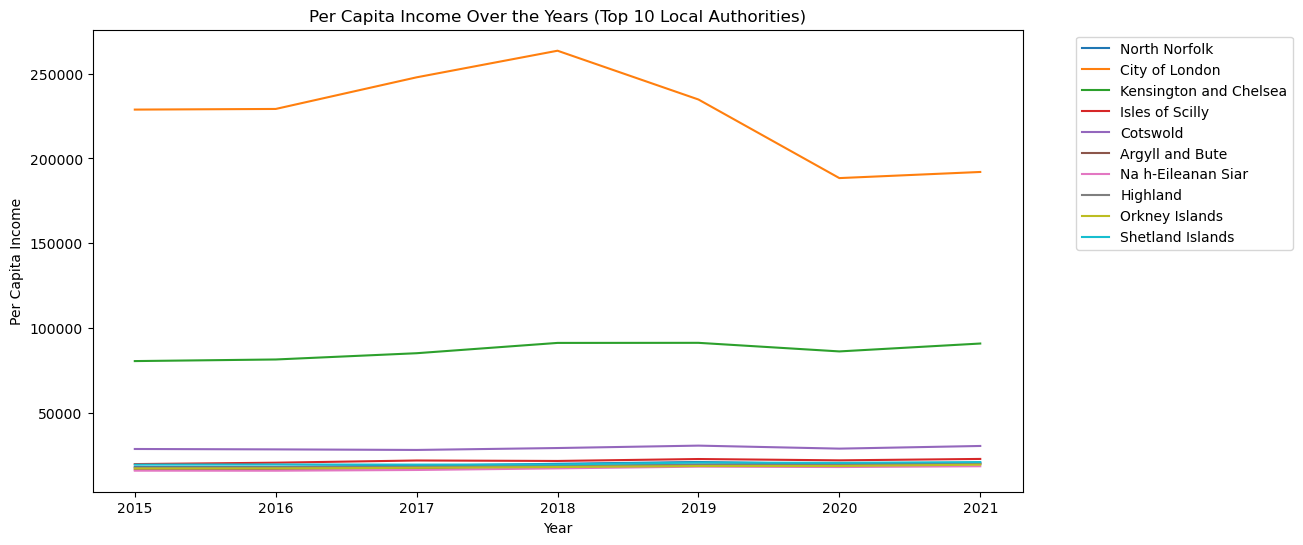

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the top N Local Authorities based on some criteria (e.g., total emissions)
top_n_local_authorities = comb_df.groupby('Local Authority')['Per Capita Electricity'].sum().nlargest(10).index

# Filter the DataFrame to include only the top N Local Authorities
filtered_df = comb_df[comb_df['Local Authority'].isin(top_n_local_authorities)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Per Capita Electricity', hue='Local Authority', data=filtered_df)

plt.title('Per Capita Electricity Emissions Over the Years (Top 10 Local Authorities)')
plt.xlabel('Year')
plt.ylabel('Per Capita Electricity Emissions (tCO2e)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

filtered_df = comb_df[comb_df['Local Authority'].isin(top_n_local_authorities)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Per Capita Income', hue='Local Authority', data=filtered_df)

plt.title('Per Capita Income Over the Years (Top 10 Local Authorities)')
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

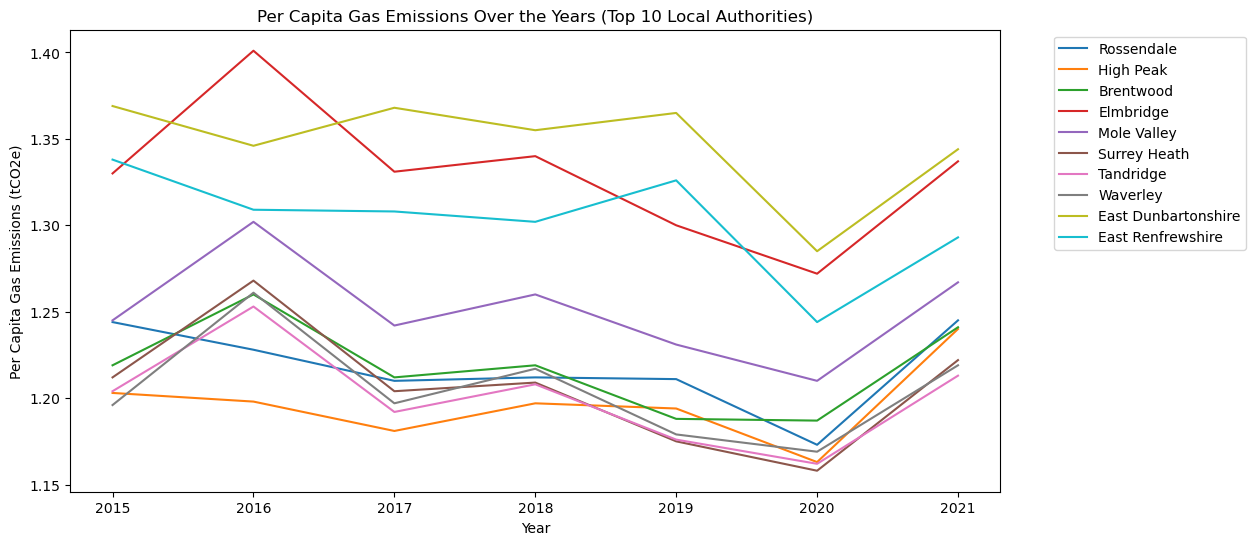

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the top N Local Authorities based on some criteria (e.g., total emissions)
top_n_local_authorities = comb_df.groupby('Local Authority')['Per Capita Gas'].sum().nlargest(10).index

# Filter the DataFrame to include only the top N Local Authorities
filtered_df = comb_df[comb_df['Local Authority'].isin(top_n_local_authorities)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Per Capita Gas', hue='Local Authority', data=filtered_df)

plt.title('Per Capita Gas Emissions Over the Years (Top 10 Local Authorities)')
plt.xlabel('Year')
plt.ylabel('Per Capita Gas Emissions (tCO2e)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


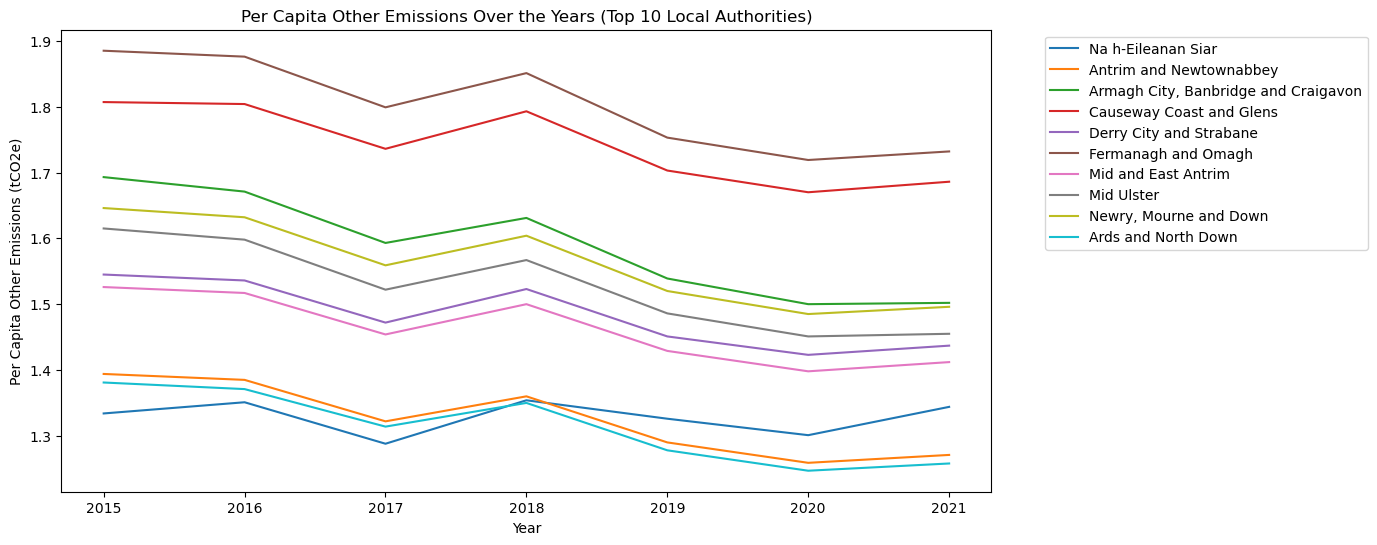

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose the top N Local Authorities based on some criteria (e.g., total emissions)
top_n_local_authorities = comb_df.groupby('Local Authority')['Per Capita Other'].sum().nlargest(10).index

# Filter the DataFrame to include only the top N Local Authorities
filtered_df = comb_df[comb_df['Local Authority'].isin(top_n_local_authorities)]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Per Capita Other', hue='Local Authority', data=filtered_df)

plt.title('Per Capita Other Emissions Over the Years (Top 10 Local Authorities)')
plt.xlabel('Year')
plt.ylabel('Per Capita Other Emissions (tCO2e)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()


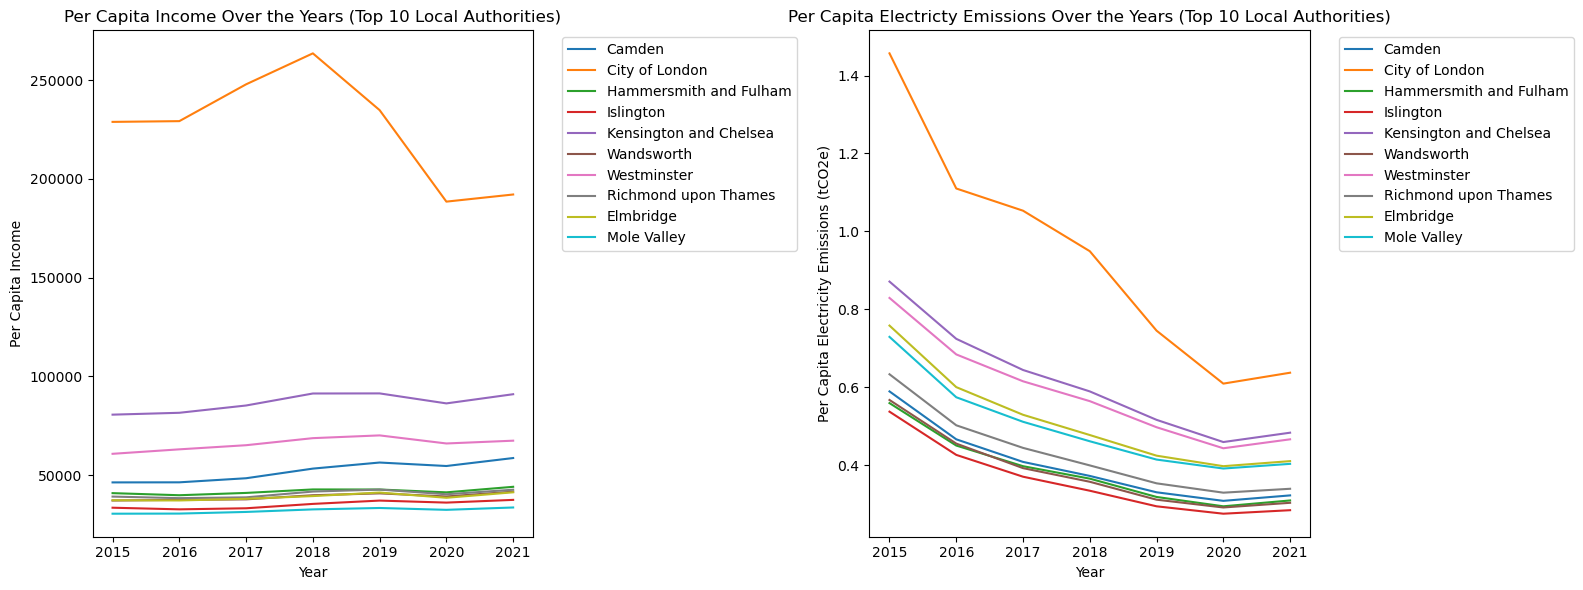

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for top 10 local authorities based on total electricity emissions
top_10_local_authorities = (
    comb_df.groupby("Local Authority")["Per Capita Income"].sum().nlargest(10).index
)
filtered_df = comb_df[comb_df["Local Authority"].isin(top_10_local_authorities)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Per Capita Electricity Emissions
sns.lineplot(
    x="Year",
    y="Per Capita Income",
    hue="Local Authority",
    data=filtered_df,
    ax=ax1,
)
ax1.set_title("Per Capita Income Over the Years (Top 10 Local Authorities)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Per Capita Income")
ax1.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Plot 2: Per Capita Income
sns.lineplot(
    x="Year", y="Per Capita Electricity", hue="Local Authority", data=filtered_df, ax=ax2
)
ax2.set_title("Per Capita Electricty Emissions Over the Years (Top 10 Local Authorities)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Per Capita Electricity Emissions (tCO2e)")
ax2.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout and display
plt.tight_layout()  # Improve spacing between subplots
plt.show()


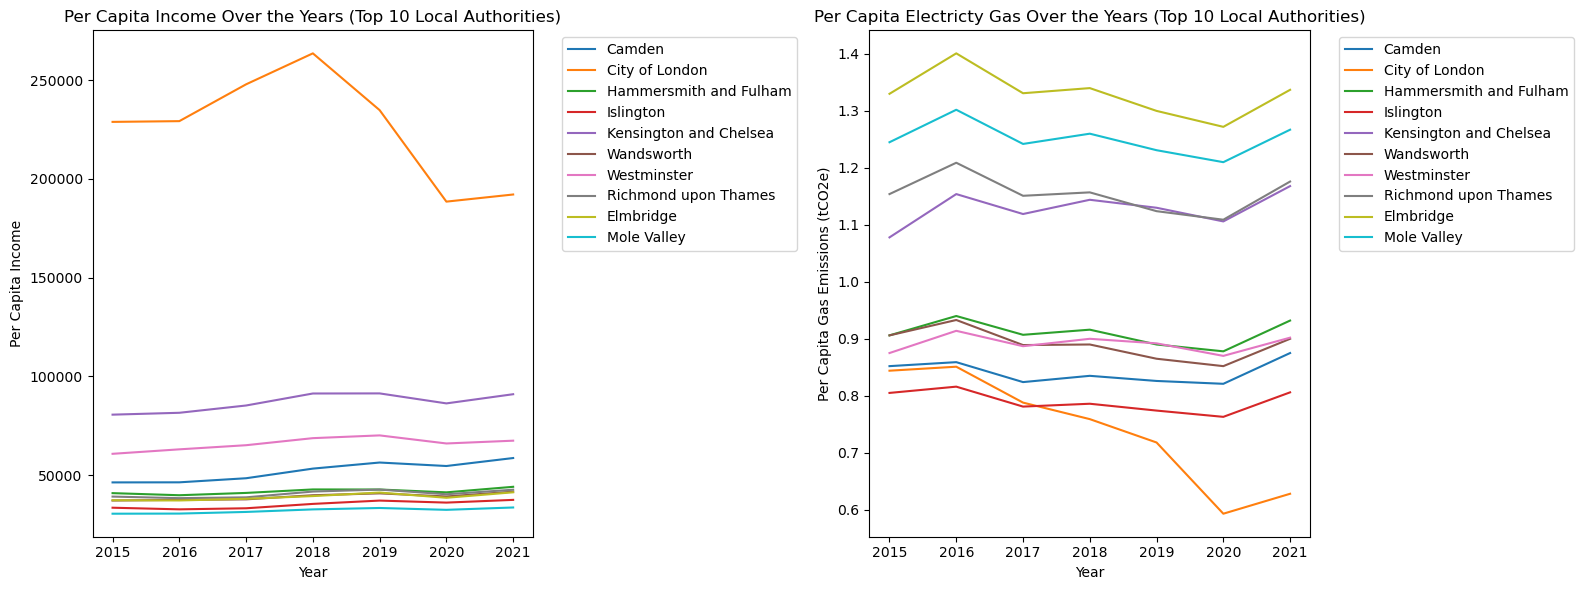

In [346]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for top 10 local authorities based on total electricity emissions
top_10_local_authorities = (
    comb_df.groupby("Local Authority")["Per Capita Income"].sum().nlargest(10).index
)
filtered_df = comb_df[comb_df["Local Authority"].isin(top_10_local_authorities)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Per Capita Electricity Emissions
sns.lineplot(
    x="Year",
    y="Per Capita Income",
    hue="Local Authority",
    data=filtered_df,
    ax=ax1,
)
ax1.set_title("Per Capita Income Over the Years (Top 10 Local Authorities)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Per Capita Income")
ax1.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Plot 2: Per Capita Income
sns.lineplot(
    x="Year", y="Per Capita Gas", hue="Local Authority", data=filtered_df, ax=ax2
)
ax2.set_title("Per Capita Electricty Gas Over the Years (Top 10 Local Authorities)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Per Capita Gas Emissions (tCO2e)")
ax2.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout and display
plt.tight_layout()  # Improve spacing between subplots
plt.show()


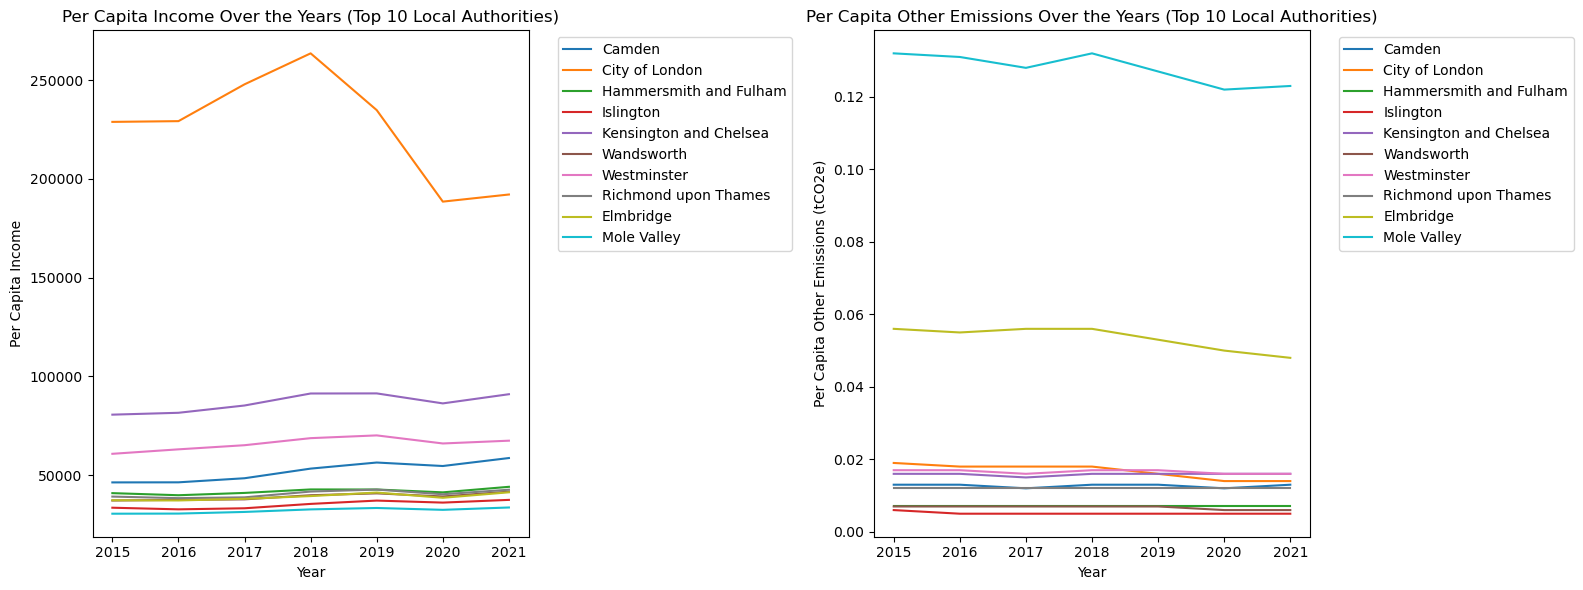

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for top 10 local authorities based on total electricity emissions
top_10_local_authorities = (
    comb_df.groupby("Local Authority")["Per Capita Income"].sum().nlargest(10).index
)
filtered_df = comb_df[comb_df["Local Authority"].isin(top_10_local_authorities)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Per Capita Electricity Emissions
sns.lineplot(
    x="Year",
    y="Per Capita Income",
    hue="Local Authority",
    data=filtered_df,
    ax=ax1,
)
ax1.set_title("Per Capita Income Over the Years (Top 10 Local Authorities)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Per Capita Income")
ax1.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Plot 2: Per Capita Income
sns.lineplot(
    x="Year", y="Per Capita Other", hue="Local Authority", data=filtered_df, ax=ax2
)
ax2.set_title("Per Capita Other Emissions Over the Years (Top 10 Local Authorities)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Per Capita Other Emissions (tCO2e)")
ax2.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout and display
plt.tight_layout()  # Improve spacing between subplots
plt.show()


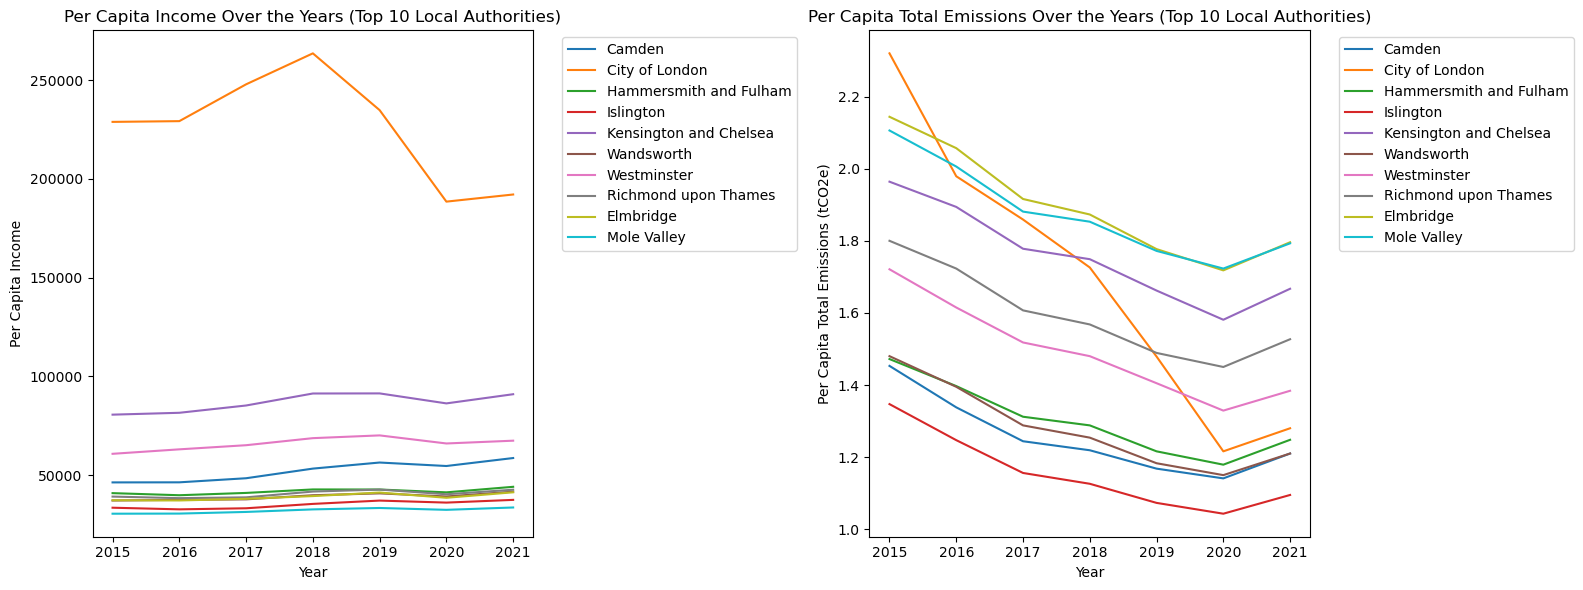

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for top 10 local authorities based on total electricity emissions
top_10_local_authorities = (
    comb_df.groupby("Local Authority")["Per Capita Income"].sum().nlargest(10).index
)
filtered_df = comb_df[comb_df["Local Authority"].isin(top_10_local_authorities)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Per Capita Electricity Emissions
sns.lineplot(
    x="Year",
    y="Per Capita Income",
    hue="Local Authority",
    data=filtered_df,
    ax=ax1,
)
ax1.set_title("Per Capita Income Over the Years (Top 10 Local Authorities)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Per Capita Income")
ax1.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Plot 2: Per Capita Income
sns.lineplot(
    x="Year", y="Per Capita Total", hue="Local Authority", data=filtered_df, ax=ax2
)
ax2.set_title("Per Capita Total Emissions Over the Years (Top 10 Local Authorities)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Per Capita Total Emissions (tCO2e)")
ax2.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout and display
plt.tight_layout()  # Improve spacing between subplots
plt.show()


C:\Users\Geethu Sebastian\AppData\Local\Temp\ipykernel_26396\1900469730.py:37: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Improve spacing between subplots


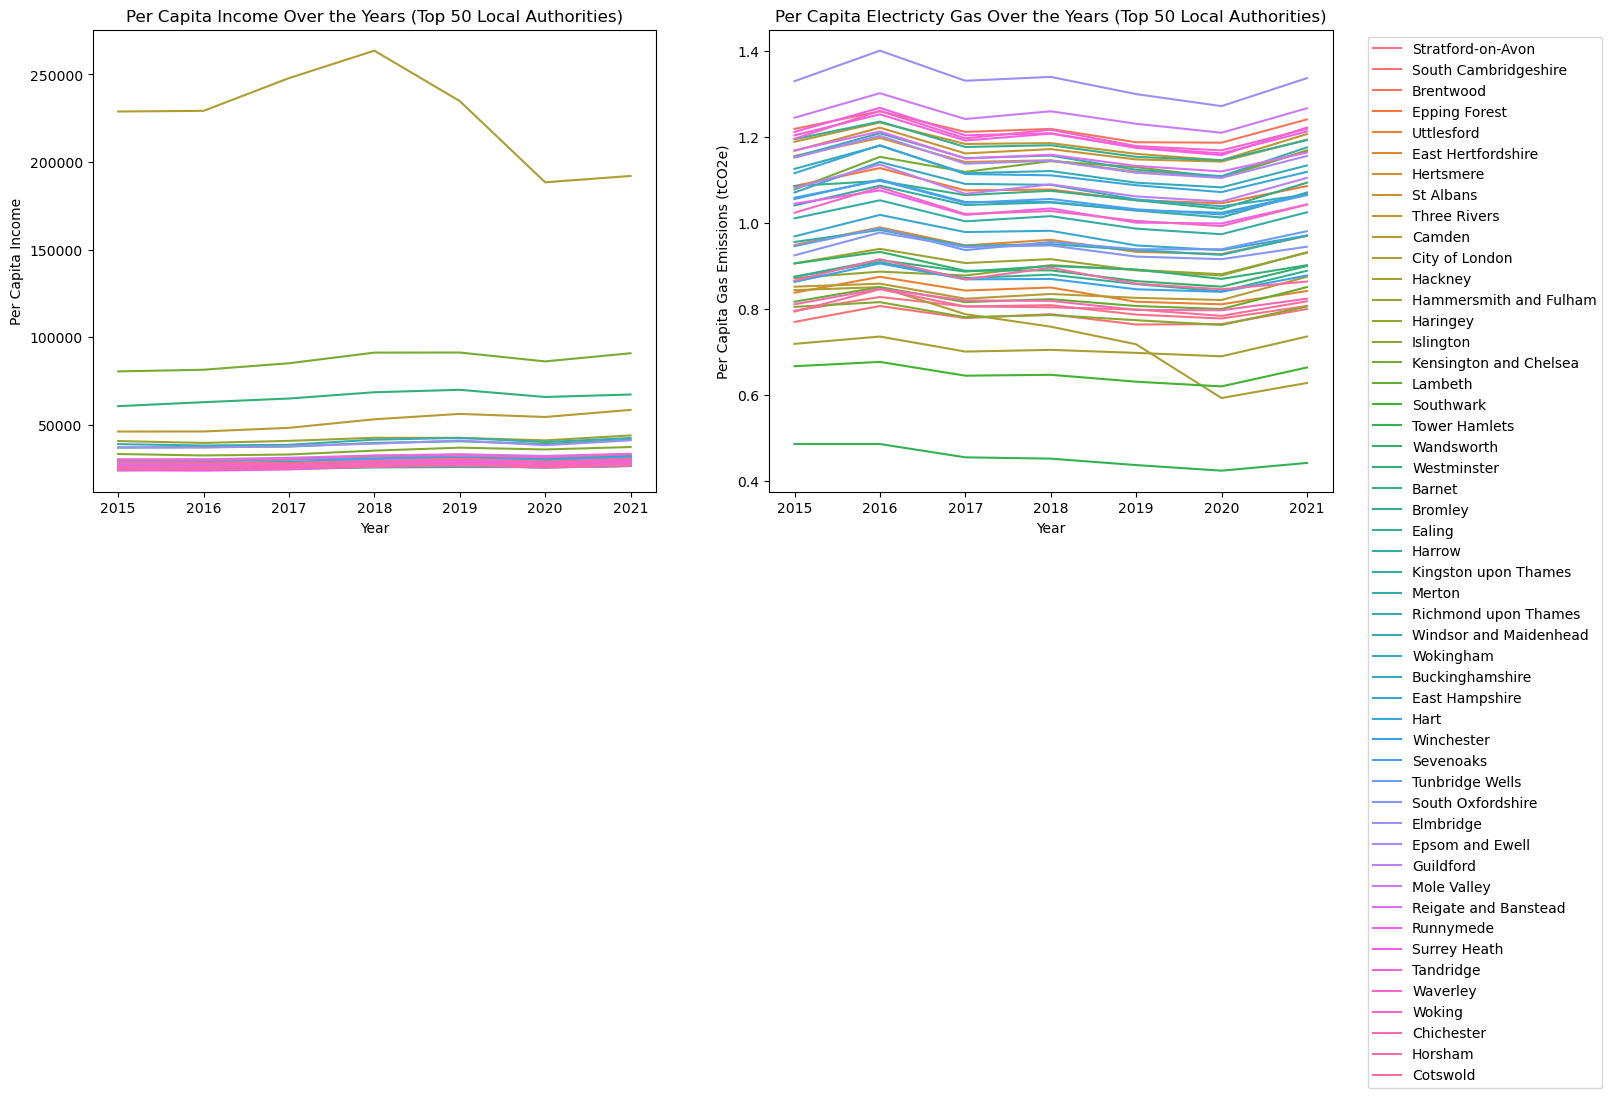

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for top 10 local authorities based on total electricity emissions
top_10_local_authorities = (
    comb_df.groupby("Local Authority")["Per Capita Income"].sum().nlargest(50).index
)
filtered_df = comb_df[comb_df["Local Authority"].isin(top_10_local_authorities)]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Per Capita Electricity Emissions
sns.lineplot(
    x="Year",
    y="Per Capita Income",
    hue="Local Authority",
    data=filtered_df,
    ax=ax1,
    legend=False,
)
ax1.set_title("Per Capita Income Over the Years (Top 50 Local Authorities)")
ax1.set_xlabel("Year")
ax1.set_ylabel("Per Capita Income")
# ax1.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Plot 2: Per Capita Income
sns.lineplot(
    x="Year", y="Per Capita Gas", hue="Local Authority", data=filtered_df, ax=ax2
)
ax2.set_title("Per Capita Electricty Gas Over the Years (Top 50 Local Authorities)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Per Capita Gas Emissions (tCO2e)")
ax2.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

# Adjust layout and display
plt.tight_layout()  # Improve spacing between subplots
plt.show()
